# 댓글 수집과 자연어처리(NLP) 및 분석

## Module Import

In [139]:
import pandas as pd
import numpy as np

# 명사추출후, 카운팅
from collections import Counter

# Mecab
from konlpy.tag import Mecab
# Mecab 사전 추가할 때, 종성 인지하는 모듈
from jamo import h2j, j2hcj 

# 한글 추출
import re

# 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# plot에 한글 표시
%config InlineBackend.figure_format = 'retina'

import matplotlib.font_manager as fm
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

from wordcloud import WordCloud
from PIL import Image
import squarify
from IPython.display import Image

# Word2Vec
from gensim.models import Word2Vec, KeyedVectors
from sklearn.manifold import TSNE

# 군집분석
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
# Scipy
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

## 데이터(댓글데이터) 불러오기
- 코드 : `WIL` Repo > `1. Crawling` > `크롤러_유튜브댓글수집용.ipynb` 참고

In [140]:
df = pd.read_csv('C:/workspace/케인댓글수집.csv', encoding = 'utf-8', index = None)
df

,Unnamed: 0,ID,Comment
0,0,수리 Suri,환갑을 바라보는 연세에도 도전하시는 모습이 진짜 뭉클하네요... 응원합니다!
1,1,이름없음,점점 숫자가 터무니 없어지는게 킬포임 ㅋㅋㅋㅋㅋㅋ
2,2,_식빵,케조씨 저렇게 빵터진거 처음봤다 맨이야이렇게 잘웃으면 얼마나좋아 코도 더 커보이고
3,3,BESKIA,지맘대로 합성해서 지원시켜버리는거 줫나웃기네 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
4,4,qualification,"01:37웅장한 배경과 베짱있는 자세, 화면 등장까지 완벽하다 ㅋㅋ진짜 잘만드셨네 ..."
...,...,...,...
1205,1205,Sam Smiith,Sz
1206,1206,쇼어,제발 내 유튜브에 보이지마 꼴보기 싫어 ㅠ
1207,1207,tina Lon,본인이 하면 재미 남이 하면 고소한국 사회 참 정겨워졌네 ㅋㅋ
1208,1208,양명규,모지리같냐


## Preprocessing
- 댓글(Comment)만 추출
- `Array` > `list` 형태로 변환

In [148]:
raw = df['Comment'].values
raw = list(raw)
raw = re.compile('[^ㄱ-ㅎㅏ-ㅣ]+').findall(str(raw))
## 자음 또는 모음만 쓰인 댓글 제거
#raw = re.sub('[ㄱ-ㅣ]', '', str(raw))
## 특수문자 쓰인 댓글 제거
#raw = re.sub('[-=.#/?:${}[]□■♥\]', '', str(raw))
raw

["['환갑을 바라보는 연세에도 도전하시는 모습이 진짜 뭉클하네요... 응원합니다!', '점점 숫자가 터무니 없어지는게 킬포임 ",
 "', '케조씨 저렇게 빵터진거 처음봤다 맨이야이렇게 잘웃으면 얼마나좋아 코도 더 커보이고', '지맘대로 합성해서 지원시켜버리는거 줫나웃기네 ",
 "', '01:37웅장한 배경과 베짱있는 자세, 화면 등장까지 완벽하다 ",
 '진짜 잘만드셨네 ',
 "', '기록 수치가 존나 근본없는게 개웃김",
 "', '가짜 사나이 2기 0화보고 왔습니다.케인님이 참여 못하신 것이 아쉽다고 생각합니다.하긴 사이클 2일 3시간하고 달리기 마하 9로 가시는 케인님이 참여하셨다면조교들이 오히려 체력이 딸려 욕먹을까봐 케인님이 불참하신게 아닌가 싶어 이해하고 있습니다.', '이렇게 코가 터지게 웃으시는 건 첨 봐요이건 귀하네요...', '진짜 케인님 웃으시니까 넘 보기좋다",
 ' 영상만드시는분도 맨날 타지리 김성근보다 저런 영상위주로 만들어주시는게 재미있는것같아요 엿날팹시맨처럼요',
 "', '케인인님 빵터져서 웃는모습 보기좋다맨이야~ 마지막극찬 까지 완벽 다시한번만보자래... 만든사람 뿌듯하겠다', '이 영상을 계기로 케인인님에 대해서 알게 되었는데 진짜",
 "이렇게 활짝 웃는 모습 또 보고싶어요', '집 갔다오기가 존나 웃기네 십 ",
 "', '1:24 글씨까지 먹어버리는 도네 흡수맨 케인', '와 케인님이 영도 보고 웃는거 진짜 오랜만에 보네",
 "', '0:45 ",
 '전 이 작은 틈 사이로 코를 조이는 편집자님 센스에 경의를 표합니다',
 "', '기분 안좋을때마다 이거 한번씩 보면 왠지 괜찮아짐 ",
 "', '케인님이 활짝 웃으시는걸 보니 나도 행복하다맨이야', '무도 이후에 이렇게 실제로 눈물날 정도로 웃어본게 처음입니다 ",
 ' 하 만드심분 진잨',
 "', '아조씨 역대급 반응이네박장대소 하는건 드문데□■□■□■□■□■□■2021년 8월 26일노인 영상의 조회수를 넘은코짜사나이 흐헤헤 흐헤헤', '시간 날 때마다 생각

### Mecab을 사용해 명사 추출

In [150]:
tagger = Mecab(dicpath = r"C:/mecab/mecab-ko-dic")

In [154]:
nouns = []
for review in raw:
    for noun in tagger.nouns(review):
        nouns.append(noun)
        
nouns

['환갑',
 '연세',
 '도전',
 '모습',
 '응원',
 '숫자',
 '터무니',
 '게',
 '포',
 '케',
 '조',
 '씨',
 '빵',
 '거',
 '코',
 '합성',
 '지원',
 '거',
 '웅장',
 '배경',
 '베',
 '짱',
 '자세',
 '화면',
 '등장',
 '완벽',
 '기록',
 '수치',
 '근본',
 '게',
 '김',
 '가짜',
 '사나이',
 '화',
 '케인',
 '참여',
 '것',
 '생각',
 '사이클',
 '일',
 '시간',
 '마하',
 '케인',
 '참여',
 '조교',
 '체력',
 '케인',
 '불참',
 '게',
 '이해',
 '코',
 '건',
 '이건',
 '케인',
 '영상',
 '분',
 '타지리',
 '김성근',
 '영상',
 '위주',
 '게',
 '것',
 '엿',
 '날',
 '팹',
 '시맨',
 '인인',
 '빵',
 '모습',
 '맨',
 '마지막',
 '극찬',
 '완벽',
 '번',
 '보자',
 '사람',
 '영상',
 '계기',
 '인인',
 '모습',
 '집',
 '십',
 '글씨',
 '도네',
 '흡수',
 '케인',
 '케인',
 '영',
 '거',
 '오랜만',
 '틈',
 '사이',
 '코',
 '편집자',
 '센스',
 '경의',
 '표',
 '기분',
 '때',
 '이거',
 '번',
 '짐',
 '케인',
 '걸',
 '나',
 '행복',
 '맨',
 '무도',
 '이후',
 '눈물',
 '날',
 '정도',
 '게',
 '처음',
 '아조',
 '씨',
 '역대',
 '급',
 '반응',
 '박장대소',
 '건',
 '년',
 '월',
 '일',
 '노인',
 '영상',
 '조',
 '회수',
 '코짜',
 '사나이',
 '시간',
 '날',
 '때',
 '생각',
 '날',
 '때',
 '그림자',
 '복도',
 '이거',
 '맨',
 '블',
 '개',
 '인인',
 '건강',
 '방송',
 '주세요',
 '타지리',
 '김성근',
 '폭소',

In [156]:
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'코': 149,
 '거': 115,
 '맨': 109,
 '나': 94,
 '케인': 91,
 '영상': 77,
 '조': 66,
 '사나이': 65,
 '집': 60,
 '씨': 54,
 '지원': 52,
 '가짜': 52,
 '번': 52,
 '개': 49,
 '마하': 42,
 '만': 41,
 '인인': 39,
 '이거': 39,
 '게': 32,
 '빵': 32,
 '회수': 31,
 '때': 30,
 '일': 28,
 '케': 26,
 '아방': 26,
 '사람': 23,
 '김': 22,
 '탱': 21,
 '분': 20,
 '편집': 19,
 '문제': 19,
 '개입': 19,
 '노인': 18,
 '난': 18,
 '모습': 17,
 '반응': 17,
 '코코': 17,
 '줄': 17,
 '이게': 17,
 '주의': 17,
 '것': 16,
 '듯': 16,
 '유튜브': 16,
 '너': 16,
 '시간': 15,
 '뭐': 15,
 '기록': 14,
 '급': 14,
 '웃음': 14,
 '아조': 13}

### Stopwords(불용어) Dictionary 만들기
- Source : "https://gist.github.com/spikeekips/40eea22ef4a89f629abd87eed535ac6a#file-stopwords-ko-txt"

In [157]:
st = pd.read_csv('stopword.txt')
st = st['가'].values
st = list(st)
st

['가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',
 '더구나'

- 불용어 제외 후, 형태소 분석 수행

In [158]:
nouns = []

for review in raw:
    for noun in tagger.nouns(review):
        if noun not in st:
            nouns.append(noun)
            
nouns[20]

'베'

- 단어 빈도수 측정

In [159]:
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'코': 149,
 '거': 115,
 '맨': 109,
 '케인': 91,
 '영상': 77,
 '조': 66,
 '사나이': 65,
 '집': 60,
 '씨': 54,
 '지원': 52,
 '가짜': 52,
 '번': 52,
 '개': 49,
 '마하': 42,
 '만': 41,
 '인인': 39,
 '이거': 39,
 '게': 32,
 '빵': 32,
 '회수': 31,
 '케': 26,
 '아방': 26,
 '사람': 23,
 '김': 22,
 '탱': 21,
 '분': 20,
 '편집': 19,
 '문제': 19,
 '개입': 19,
 '노인': 18,
 '난': 18,
 '모습': 17,
 '반응': 17,
 '코코': 17,
 '줄': 17,
 '이게': 17,
 '주의': 17,
 '듯': 16,
 '유튜브': 16,
 '뭐': 15,
 '기록': 14,
 '급': 14,
 '웃음': 14,
 '아조': 13,
 '중': 13,
 '내': 13,
 '텐': 13,
 '배': 13,
 '수': 13,
 '말': 13}

## 시각화1

- 단어 빈도 시각화

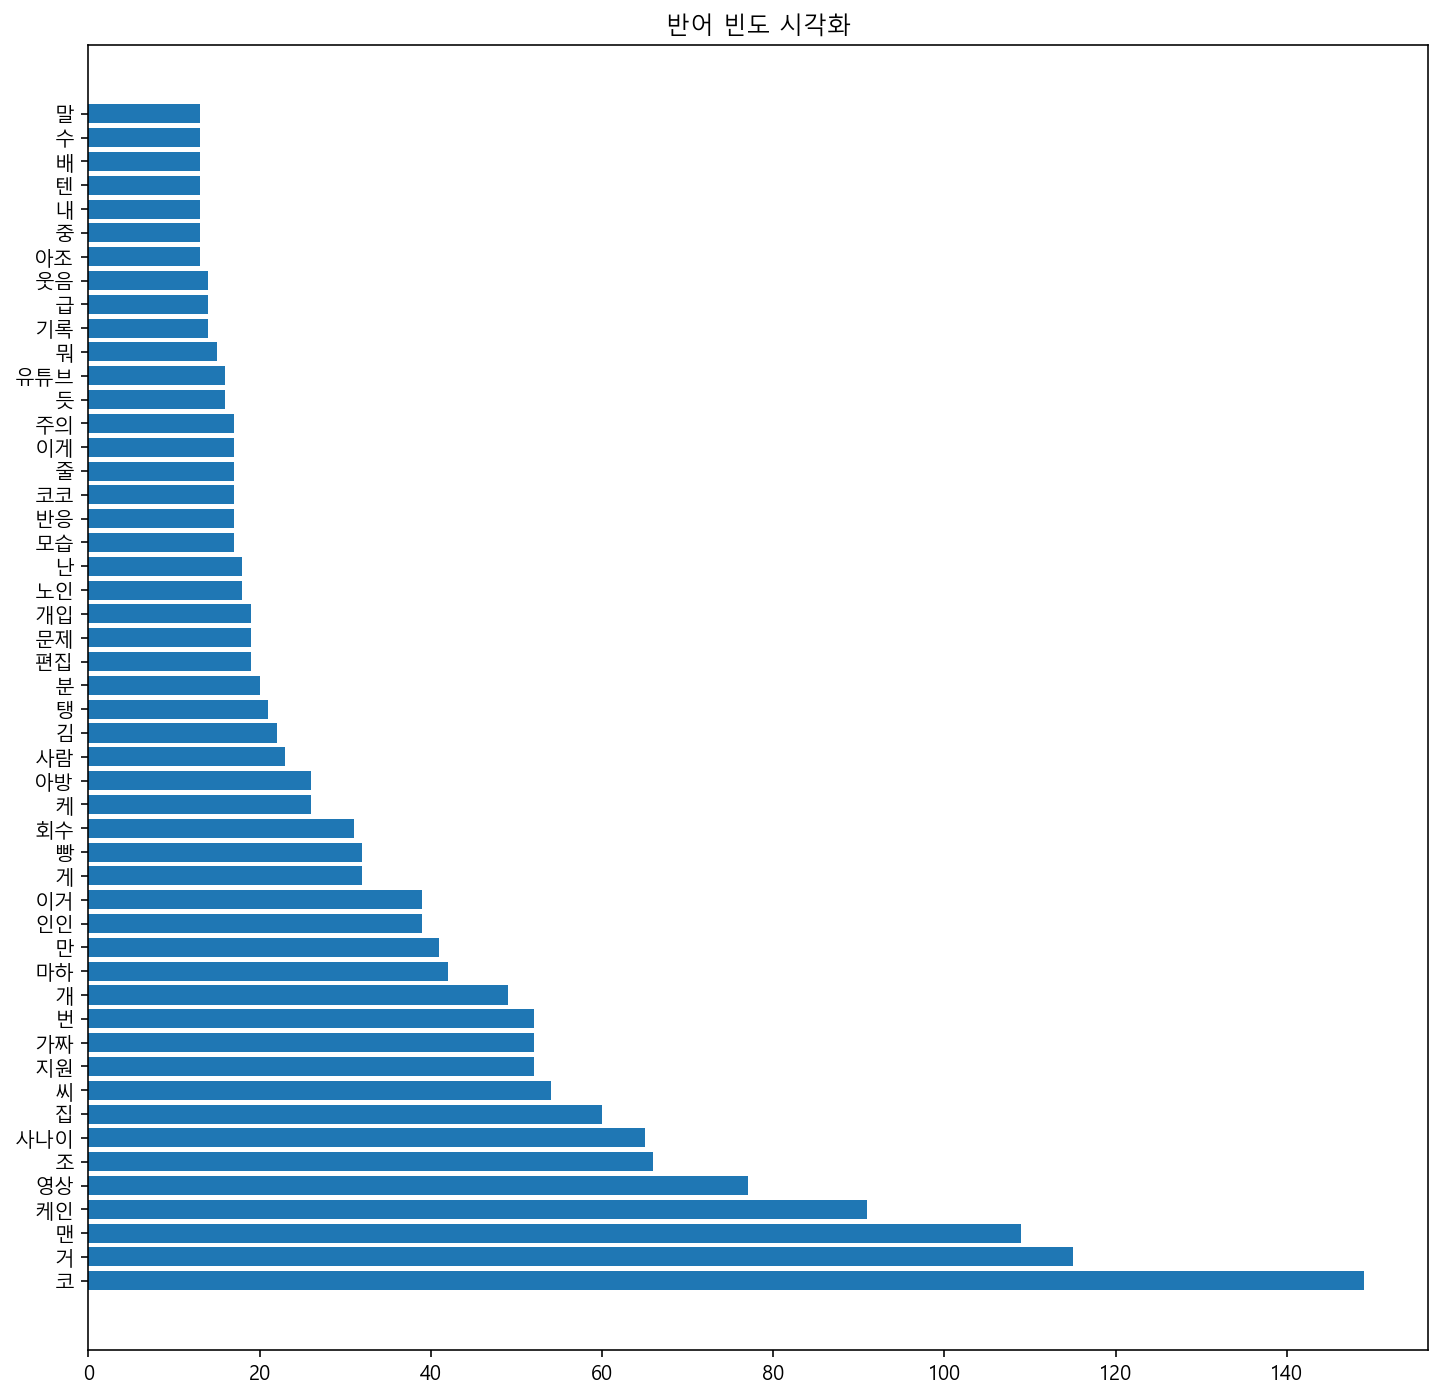

In [161]:
# Plot
y_pos = np.arange(len(top_nouns))

plt.figure(figsize = (12, 12))
plt.barh(y_pos, top_nouns.values())
plt.title('반어 빈도 시각화')
plt.yticks(y_pos, top_nouns.keys())
plt.show()

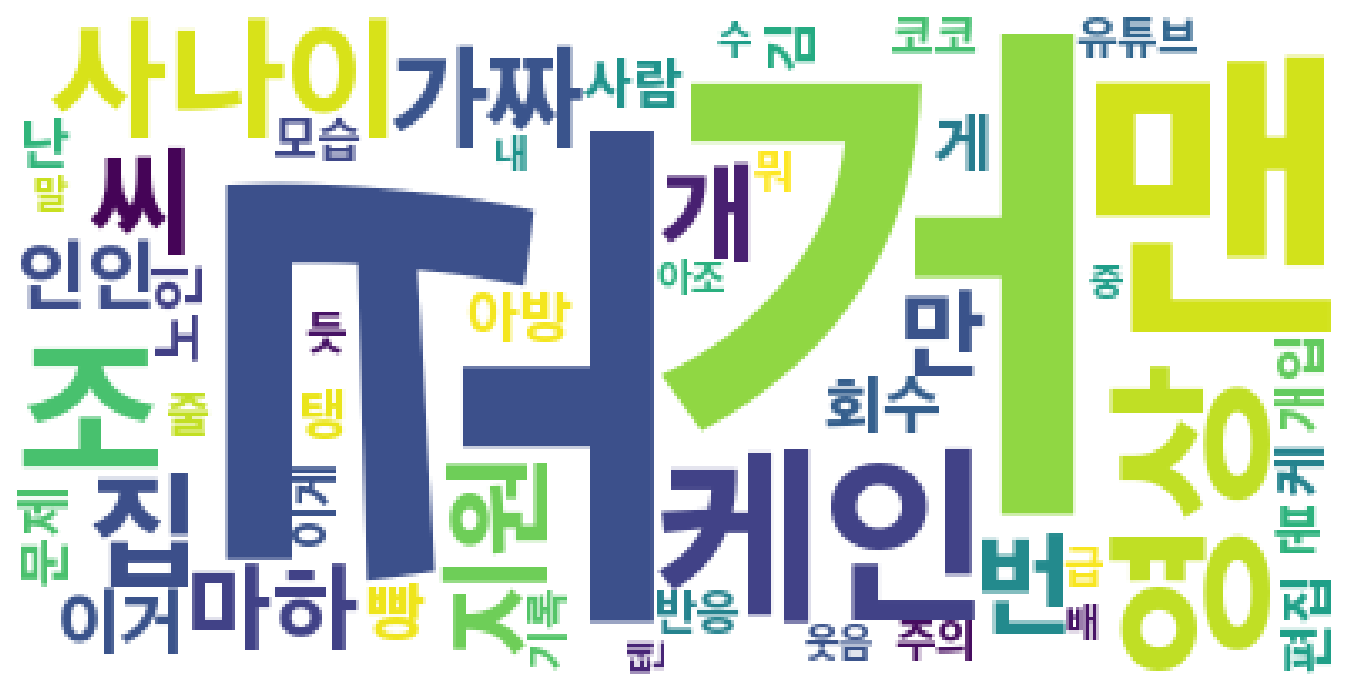

In [165]:
# Wordcloud
wc = WordCloud(background_color = 'white',
              font_path = 'C:/dd/AppleSDGothicNeoEB.ttf')
wc.generate_from_frequencies(top_nouns)

figure = plt.figure(figsize = (12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

## 평가

- Mecab Dictionary에 단어를 일부 추가해야겠다. 
- 유튜브에서 쓰이는 해당 스트리머 밈들이 모두 명사처리가 안되어 제대로된 분석이 이루어지지 않고 있음.
    * 추가할 단어 : `케조씨`,`아조씨`, `아조시`, `케조시`, `뭉탱이`, `타지리`, `불쌍맨`, `역가드`, `하더놈`, `하던놈`, `할아방탱`, `햇코코`, `뭉탱` 등
- 해당 단어 추가 후 결과 보고 `stopword dictionary`도 수정할 예정

## 보완

In [2]:
# dict추가 전 단어를 전혀 잡아내지못함
m = Mecab(r"C:/mecab/mecab-ko-dic")

m.pos('이것은 테스트입니다. 케조씨는 코가 참 큰 불쌍맨이야. 근데 아조씨가 역가드 창시자라며? 한때, 하더놈이였구나? 구글이 뭉탱이로있네')

[('이것', 'NP'),
 ('은', 'JX'),
 ('테스트', 'NNG'),
 ('입니다', 'VCP+EF'),
 ('.', 'SF'),
 ('케', 'IC'),
 ('조', 'NNP'),
 ('씨', 'NNB'),
 ('는', 'JX'),
 ('코', 'NNG'),
 ('가', 'JKS'),
 ('참', 'MAG'),
 ('큰', 'VA+ETM'),
 ('불쌍맨', 'NNP'),
 ('이', 'VCP'),
 ('야', 'EF'),
 ('.', 'SF'),
 ('근데', 'MAJ'),
 ('아조씨', 'NNP'),
 ('가', 'JKS'),
 ('역가드', 'NNP'),
 ('창시자', 'NNG'),
 ('라며', 'VCP+EF'),
 ('?', 'SF'),
 ('한때', 'NNG'),
 (',', 'SC'),
 ('하더놈', 'NNP'),
 ('이', 'VCP'),
 ('였', 'EP'),
 ('구나', 'EF'),
 ('?', 'SF'),
 ('구글', 'NNG'),
 ('이', 'JKS'),
 ('뭉탱', 'NNP'),
 ('이', 'XSN'),
 ('로', 'JKB'),
 ('있', 'VV'),
 ('네', 'EC')]

### 사용자가 원하는 단어 추가
- 사용자가 원하는 단어 추가
    - `nnp.csv` *고유명사 파일*에 추가

In [3]:
with open(r"C:/mecab/user-dic/nnp.csv", 'r', encoding = 'utf-8') as f:
    file_data = f.readlines()

In [4]:
file_data

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n', '구글,,,,NNP,*,T,구글,*,*,*,*,*\n']

In [8]:
# 종성 'T', 'F' 추가 함수
def get_jongsung_TF(sample_text): 
    sample_text_list = list(sample_text) 
    last_word = sample_text_list[-1] 
    last_word_jamo_list = list(j2hcj(h2j(last_word))) 
    last_jamo = last_word_jamo_list[-1] 
    jongsung_TF = "T" 
    if last_jamo in ['ㅏ', 'ㅑ', 'ㅓ', 'ㅕ', 'ㅗ', 'ㅛ', 'ㅜ', 'ㅠ', 'ㅡ', 'ㅣ', 'ㅘ', 'ㅚ', 'ㅙ', 'ㅝ', 'ㅞ', 'ㅢ', 'ㅐ,ㅔ', 'ㅟ', 'ㅖ', 'ㅒ']: 
        jongsung_TF = "F" 
        
    return jongsung_TF

In [9]:
# Dict에 추가할 단어
word_list = ['케조씨', '케조시', '아조씨', '아조시', '뭉탱이', '타지리', '불쌍맨', '역가드', '하더놈', '하던놈', '할아방탱', '햇코코', '뭉탱']

for word in word_list:
    jongsung_TF = get_jongsung_TF(word)
    
    # Dictionary 단어 형식
    line = '{},,,,NNP,*,{},{},*,*,*,*,*\n'.format(word, jongsung_TF, word)
    
    file_data.append(line)

In [11]:
with open(r"C:/mecab/user-dic/nnp.csv", 'w', encoding = 'utf-8') as f:
    for line in file_data:
        f.write(str(line))  ## Input할때, str() 함수 써줘야함

In [13]:
with open(r"C:/mecab/user-dic/nnp.csv", 'r', encoding = 'utf-8') as f:
    file_new = f.readlines()
    
file_new

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '케조시,,,,NNP,*,F,케조시,*,*,*,*,*\n',
 '아조씨,,,,NNP,*,F,아조씨,*,*,*,*,*\n',
 '아조시,,,,NNP,*,F,아조시,*,*,*,*,*\n',
 '뭉탱이,,,,NNP,*,F,뭉탱이,*,*,*,*,*\n',
 '타지리,,,,NNP,*,F,타지리,*,*,*,*,*\n',
 '불쌍맨,,,,NNP,*,T,불쌍맨,*,*,*,*,*\n',
 '역가드,,,,NNP,*,F,역가드,*,*,*,*,*\n',
 '하더놈,,,,NNP,*,T,하더놈,*,*,*,*,*\n',
 '하던놈,,,,NNP,*,T,하던놈,*,*,*,*,*\n',
 '할아방탱,,,,NNP,*,T,할아방탱,*,*,*,*,*\n',
 '햇코코,,,,NNP,*,F,햇코코,*,*,*,*,*\n',
 '뭉탱,,,,NNP,*,T,뭉탱,*,*,*,*,*\n']

### Compile

- 사전추가 후
> Window `powershell` 실행  > `cd /mecab` > `tools\add-userdic-win.ps1` > " done! " 뜨면 완료
- 혹시나, `이 시스템에서 스크립트를 실행할 수 없으므로 ~~에 파일을 로드할 수 없다.`라는 오류가 뜰 경우, `executionPolicy` 입력 후, `Restricted`메시지 확인<br></br>
- `Set-ExecutionPolicy Unrestricted` 입력 후, 위 과정 다시 반복

- Dictionary 추가 결과 확인

In [3]:
m = Mecab(r"C:/mecab/mecab-ko-dic")

m.pos('이것은 테스트입니다. 케조시는 코가 참 큰 불쌍맨이야. \
      근데 아조씨가 역가드 창시자라며? 한때, 하더놈이였구나? 구글이 뭉탱이로있네, 아조시는 코가 정말로 크지. 마치 타지리처럼 말이야 \
      할아방탱이는 코가 길기때문에 하더놈한테 맞았지.')

[('이것', 'NP'),
 ('은', 'JX'),
 ('테스트', 'NNG'),
 ('입니다', 'VCP+EF'),
 ('.', 'SF'),
 ('케조시', 'NNP'),
 ('는', 'JX'),
 ('코', 'NNG'),
 ('가', 'JKS'),
 ('참', 'MAG'),
 ('큰', 'VA+ETM'),
 ('불쌍맨', 'NNP'),
 ('이', 'VCP'),
 ('야', 'EF'),
 ('.', 'SF'),
 ('근데', 'MAJ'),
 ('아조씨', 'NNP'),
 ('가', 'JKS'),
 ('역가드', 'NNP'),
 ('창시자', 'NNG'),
 ('라며', 'VCP+EF'),
 ('?', 'SF'),
 ('한때', 'NNG'),
 (',', 'SC'),
 ('하더놈', 'NNP'),
 ('이', 'VCP'),
 ('였', 'EP'),
 ('구나', 'EF'),
 ('?', 'SF'),
 ('구글', 'NNG'),
 ('이', 'JKS'),
 ('뭉탱', 'NNP'),
 ('이', 'XSN'),
 ('로', 'JKB'),
 ('있', 'VX'),
 ('네', 'EF'),
 (',', 'SC'),
 ('아조시', 'NNP'),
 ('는', 'JX'),
 ('코', 'NNG'),
 ('가', 'JKS'),
 ('정말로', 'MAG'),
 ('크', 'VA'),
 ('지', 'EF'),
 ('.', 'SF'),
 ('마치', 'MAG'),
 ('타지리', 'NNP'),
 ('처럼', 'JKB'),
 ('말', 'NNG'),
 ('이', 'VCP'),
 ('야', 'EC'),
 ('할아방탱', 'NNP'),
 ('이', 'XSN'),
 ('는', 'JX'),
 ('코', 'NNG'),
 ('가', 'JKS'),
 ('길', 'VA'),
 ('기', 'ETN'),
 ('때문', 'NNB'),
 ('에', 'JKB'),
 ('하더놈', 'NNP'),
 ('한테', 'JKB'),
 ('맞', 'VV'),
 ('았', 'EP'),
 ('지', 'EF'),
 (

- `케조씨`, `하던놈` 인지 못함
    - 확인 결과, `케조씨`는 누락됐고, `하던놈`은 잘 저장되어있으나 단어로 인식 안된다

- 더불어서, `조이고`, `트수`, `스트리머`, `찐텐`, `트위치`, `케인인님` 추가 필요

- 사전 추가 후, 다시 적용

In [3]:
df = pd.read_csv('C:/workspace/케인댓글수집.csv', encoding = 'utf-8')
df

,Unnamed: 0,ID,Comment
0,0,수리 Suri,환갑을 바라보는 연세에도 도전하시는 모습이 진짜 뭉클하네요... 응원합니다!
1,1,이름없음,점점 숫자가 터무니 없어지는게 킬포임 ㅋㅋㅋㅋㅋㅋ
2,2,_식빵,케조씨 저렇게 빵터진거 처음봤다 맨이야이렇게 잘웃으면 얼마나좋아 코도 더 커보이고
3,3,BESKIA,지맘대로 합성해서 지원시켜버리는거 줫나웃기네 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
4,4,qualification,"01:37웅장한 배경과 베짱있는 자세, 화면 등장까지 완벽하다 ㅋㅋ진짜 잘만드셨네 ..."
...,...,...,...
1205,1205,Sam Smiith,Sz
1206,1206,쇼어,제발 내 유튜브에 보이지마 꼴보기 싫어 ㅠ
1207,1207,tina Lon,본인이 하면 재미 남이 하면 고소한국 사회 참 정겨워졌네 ㅋㅋ
1208,1208,양명규,모지리같냐


In [4]:
raw = df['Comment'].values
raw = list(raw)
raw = re.compile('[^ㄱ-ㅎㅏ-ㅣ]+').findall(str(raw))
raw

["['환갑을 바라보는 연세에도 도전하시는 모습이 진짜 뭉클하네요... 응원합니다!', '점점 숫자가 터무니 없어지는게 킬포임 ",
 "', '케조씨 저렇게 빵터진거 처음봤다 맨이야이렇게 잘웃으면 얼마나좋아 코도 더 커보이고', '지맘대로 합성해서 지원시켜버리는거 줫나웃기네 ",
 "', '01:37웅장한 배경과 베짱있는 자세, 화면 등장까지 완벽하다 ",
 '진짜 잘만드셨네 ',
 "', '기록 수치가 존나 근본없는게 개웃김",
 "', '가짜 사나이 2기 0화보고 왔습니다.케인님이 참여 못하신 것이 아쉽다고 생각합니다.하긴 사이클 2일 3시간하고 달리기 마하 9로 가시는 케인님이 참여하셨다면조교들이 오히려 체력이 딸려 욕먹을까봐 케인님이 불참하신게 아닌가 싶어 이해하고 있습니다.', '이렇게 코가 터지게 웃으시는 건 첨 봐요이건 귀하네요...', '진짜 케인님 웃으시니까 넘 보기좋다",
 ' 영상만드시는분도 맨날 타지리 김성근보다 저런 영상위주로 만들어주시는게 재미있는것같아요 엿날팹시맨처럼요',
 "', '케인인님 빵터져서 웃는모습 보기좋다맨이야~ 마지막극찬 까지 완벽 다시한번만보자래... 만든사람 뿌듯하겠다', '이 영상을 계기로 케인인님에 대해서 알게 되었는데 진짜",
 "이렇게 활짝 웃는 모습 또 보고싶어요', '집 갔다오기가 존나 웃기네 십 ",
 "', '1:24 글씨까지 먹어버리는 도네 흡수맨 케인', '와 케인님이 영도 보고 웃는거 진짜 오랜만에 보네",
 "', '0:45 ",
 '전 이 작은 틈 사이로 코를 조이는 편집자님 센스에 경의를 표합니다',
 "', '기분 안좋을때마다 이거 한번씩 보면 왠지 괜찮아짐 ",
 "', '케인님이 활짝 웃으시는걸 보니 나도 행복하다맨이야', '무도 이후에 이렇게 실제로 눈물날 정도로 웃어본게 처음입니다 ",
 ' 하 만드심분 진잨',
 "', '아조씨 역대급 반응이네박장대소 하는건 드문데□■□■□■□■□■□■2021년 8월 26일노인 영상의 조회수를 넘은코짜사나이 흐헤헤 흐헤헤', '시간 날 때마다 생각

In [5]:
tagger = Mecab(dicpath = r"C:/mecab/mecab-ko-dic")

In [6]:
nouns = []
for review in raw:
    for noun in tagger.nouns(review):
        nouns.append(noun)
        
nouns

['환갑',
 '연세',
 '도전',
 '모습',
 '응원',
 '숫자',
 '터무니',
 '게',
 '포',
 '케조씨',
 '빵',
 '거',
 '코',
 '합성',
 '지원',
 '거',
 '웅장',
 '배경',
 '베',
 '짱',
 '자세',
 '화면',
 '등장',
 '완벽',
 '기록',
 '수치',
 '근본',
 '게',
 '김',
 '가짜',
 '사나이',
 '화',
 '케인',
 '참여',
 '것',
 '생각',
 '사이클',
 '일',
 '시간',
 '마하',
 '케인',
 '참여',
 '조교',
 '체력',
 '케인',
 '불참',
 '게',
 '이해',
 '코',
 '건',
 '이건',
 '케인',
 '영상',
 '분',
 '타지리',
 '김성근',
 '영상',
 '위주',
 '게',
 '것',
 '엿',
 '날',
 '팹',
 '시맨',
 '케인인님',
 '빵',
 '모습',
 '맨',
 '마지막',
 '극찬',
 '완벽',
 '번',
 '보자',
 '사람',
 '영상',
 '계기',
 '케인인님',
 '모습',
 '집',
 '십',
 '글씨',
 '도네',
 '흡수',
 '케인',
 '케인',
 '영',
 '거',
 '오랜만',
 '틈',
 '사이',
 '코',
 '편집자',
 '센스',
 '경의',
 '표',
 '기분',
 '때',
 '이거',
 '번',
 '짐',
 '케인',
 '걸',
 '나',
 '행복',
 '맨',
 '무도',
 '이후',
 '눈물',
 '날',
 '정도',
 '게',
 '처음',
 '아조씨',
 '역대',
 '급',
 '반응',
 '박장대소',
 '건',
 '년',
 '월',
 '일',
 '노인',
 '영상',
 '조',
 '회수',
 '코짜',
 '사나이',
 '시간',
 '날',
 '때',
 '생각',
 '날',
 '때',
 '그림자',
 '복도',
 '이거',
 '맨',
 '블',
 '개',
 '케인인님',
 '건강',
 '방송',
 '주세요',
 '타지리',
 '김성근',
 '폭소',
 '정통',
 

In [7]:
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'코': 148,
 '거': 115,
 '맨': 108,
 '나': 94,
 '케인': 88,
 '영상': 77,
 '사나이': 65,
 '집': 60,
 '지원': 52,
 '가짜': 52,
 '번': 52,
 '개': 49,
 '마하': 42,
 '케인인님': 42,
 '만': 41,
 '이거': 39,
 '케조씨': 33,
 '게': 32,
 '빵': 32,
 '조': 32,
 '회수': 31,
 '때': 30,
 '일': 28,
 '할아방탱': 25,
 '사람': 23,
 '김': 22,
 '분': 21,
 '편집': 19,
 '문제': 19,
 '개입': 19,
 '노인': 18,
 '난': 18,
 '모습': 17,
 '반응': 17,
 '줄': 17,
 '이게': 17,
 '주의': 17,
 '것': 16,
 '듯': 16,
 '유튜브': 16,
 '너': 16,
 '시간': 15,
 '기록': 14,
 '급': 14,
 '웃음': 14,
 '뭐': 14,
 '중': 13,
 '내': 13,
 '찐텐': 13,
 '배': 13}

- 실제 데이터엔 `조이고`라는 단어가 많이 나오나, 4번으로 count 된다. 왜그럴까?
- 원문에 `조이고`라는 단어가 띄어쓰기로 구분이 안되서 그런가?
- 실험해보자

In [8]:
sen = '게이조이고 아조씨조이고케조씨조이고'

tagger.nouns(sen)

['게이조', '아조씨', '조이고', '케조씨']

- 잡아내는데..?
- 4번밖에 못잡아내는 이유를 모르겠다

### Stopword 추가

- 불용어 더 추가해서 정제된 고유명사만 잡아내보자
    - `전 난 일 걸 뭐 줄 만 건 분 개 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것`


In [9]:
st = pd.read_csv('stopword.txt')
st = st['가'].values
st = list(st)
st

['가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '개',
 '거',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 

In [10]:
nouns = []

for review in raw:
    for noun in tagger.nouns(review):
        if noun not in st:
            nouns.append(noun)
            
nouns[20]

'완벽'

In [11]:
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'코': 148,
 '맨': 108,
 '케인': 88,
 '영상': 77,
 '사나이': 65,
 '집': 60,
 '지원': 52,
 '가짜': 52,
 '마하': 42,
 '케인인님': 42,
 '케조씨': 33,
 '빵': 32,
 '조': 32,
 '회수': 31,
 '할아방탱': 25,
 '사람': 23,
 '김': 22,
 '편집': 19,
 '문제': 19,
 '개입': 19,
 '노인': 18,
 '모습': 17,
 '반응': 17,
 '이게': 17,
 '주의': 17,
 '유튜브': 16,
 '기록': 14,
 '급': 14,
 '웃음': 14,
 '찐텐': 13,
 '배': 13,
 '왕': 12,
 '브금': 12,
 '기네': 12,
 '위': 12,
 '응원': 11,
 '행복': 11,
 '정도': 11,
 '아조씨': 11,
 '다리': 11,
 '햇코코': 11,
 '코걸이': 11,
 '씨': 11,
 '생각': 10,
 '역대': 10,
 '레전드': 10,
 '난투': 10,
 '이건': 9,
 '도네': 9,
 '기분': 9}

## 시각화2

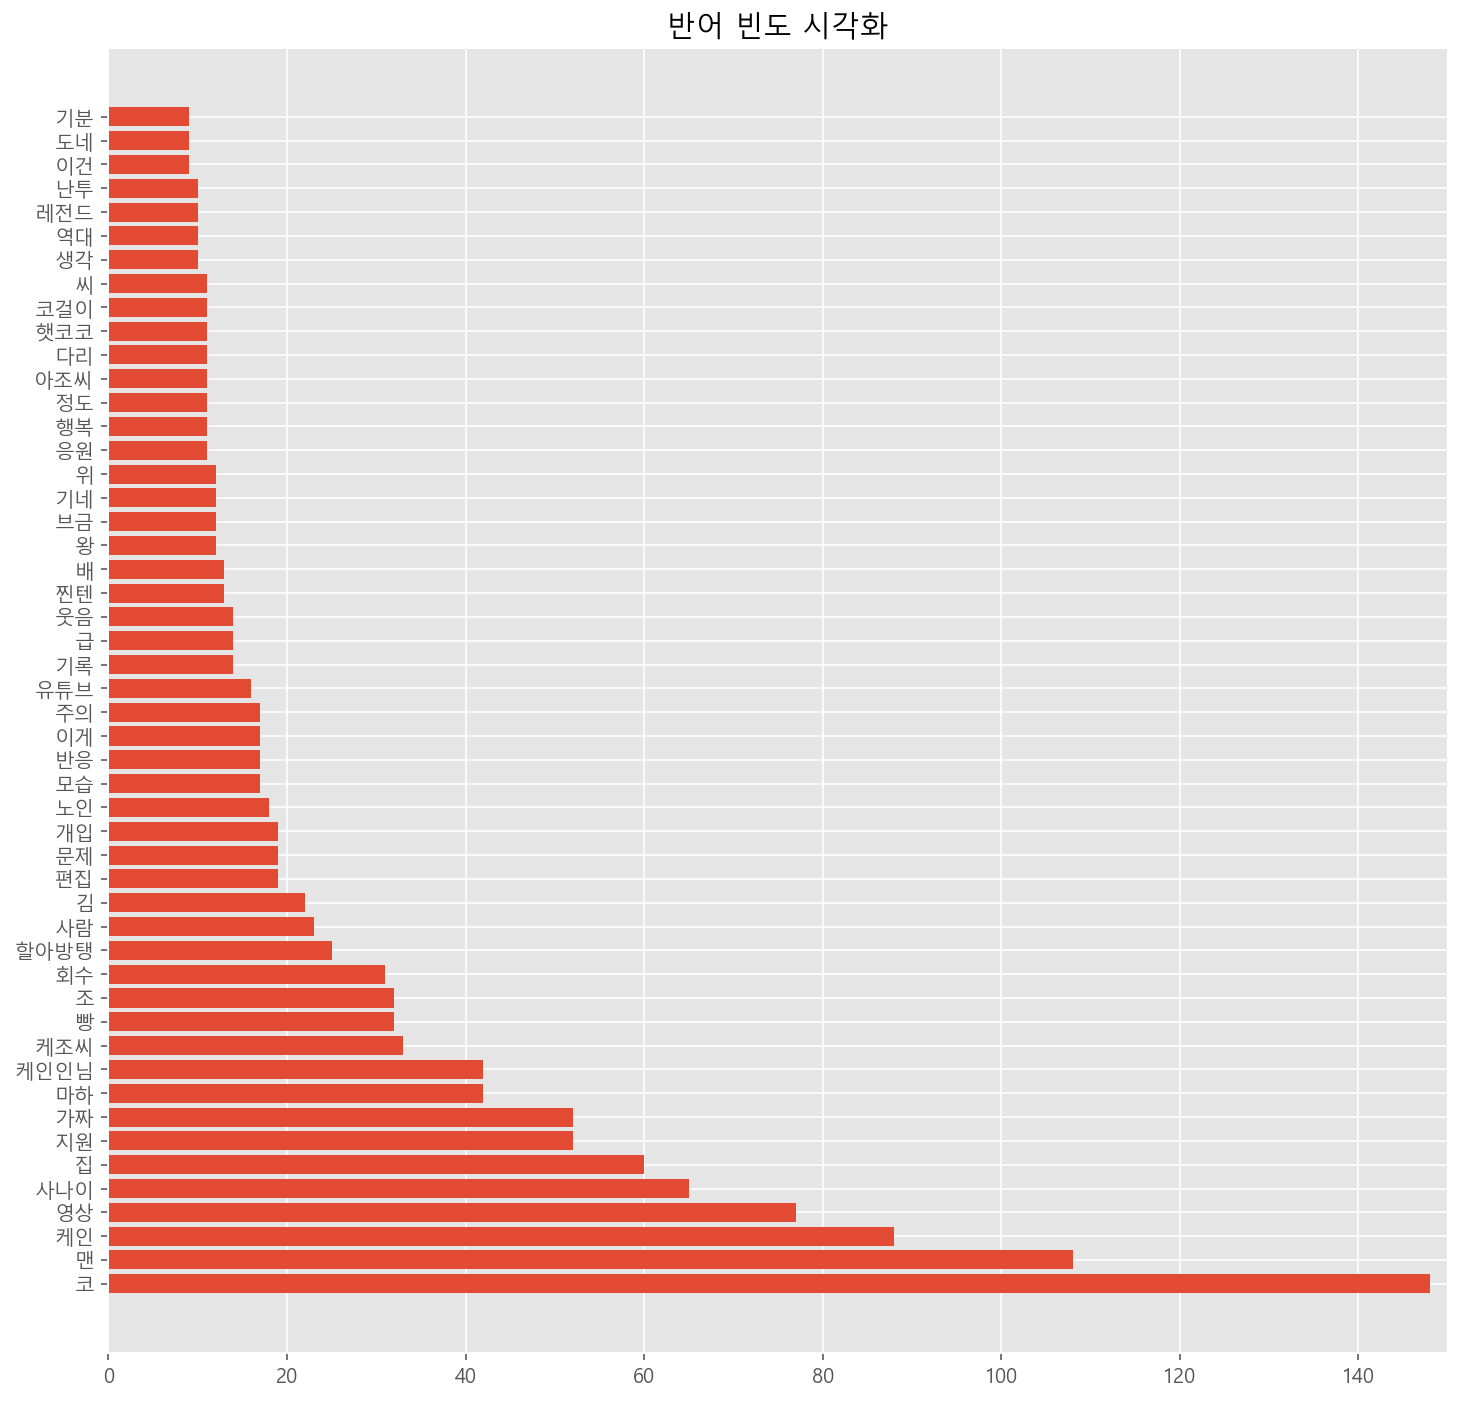

In [12]:
y_pos = np.arange(len(top_nouns))

plt.figure(figsize = (12, 12))
#sns.barplot(list(y_pos), list(unsorted_dict.values()), orient = 'h')  ## seaborn은 value 넣어줄때 list형태로 넣어줘야함
plt.barh(y_pos, top_nouns.values())
plt.title('반어 빈도 시각화')
plt.yticks(y_pos, top_nouns.keys())
plt.xlim(0, 150)
plt.show()

- 참고 사이트 : "https://ichi.pro/ko/python-eulo-uimiissneun-dan-eo-guleum-saengseong-100630905917163"

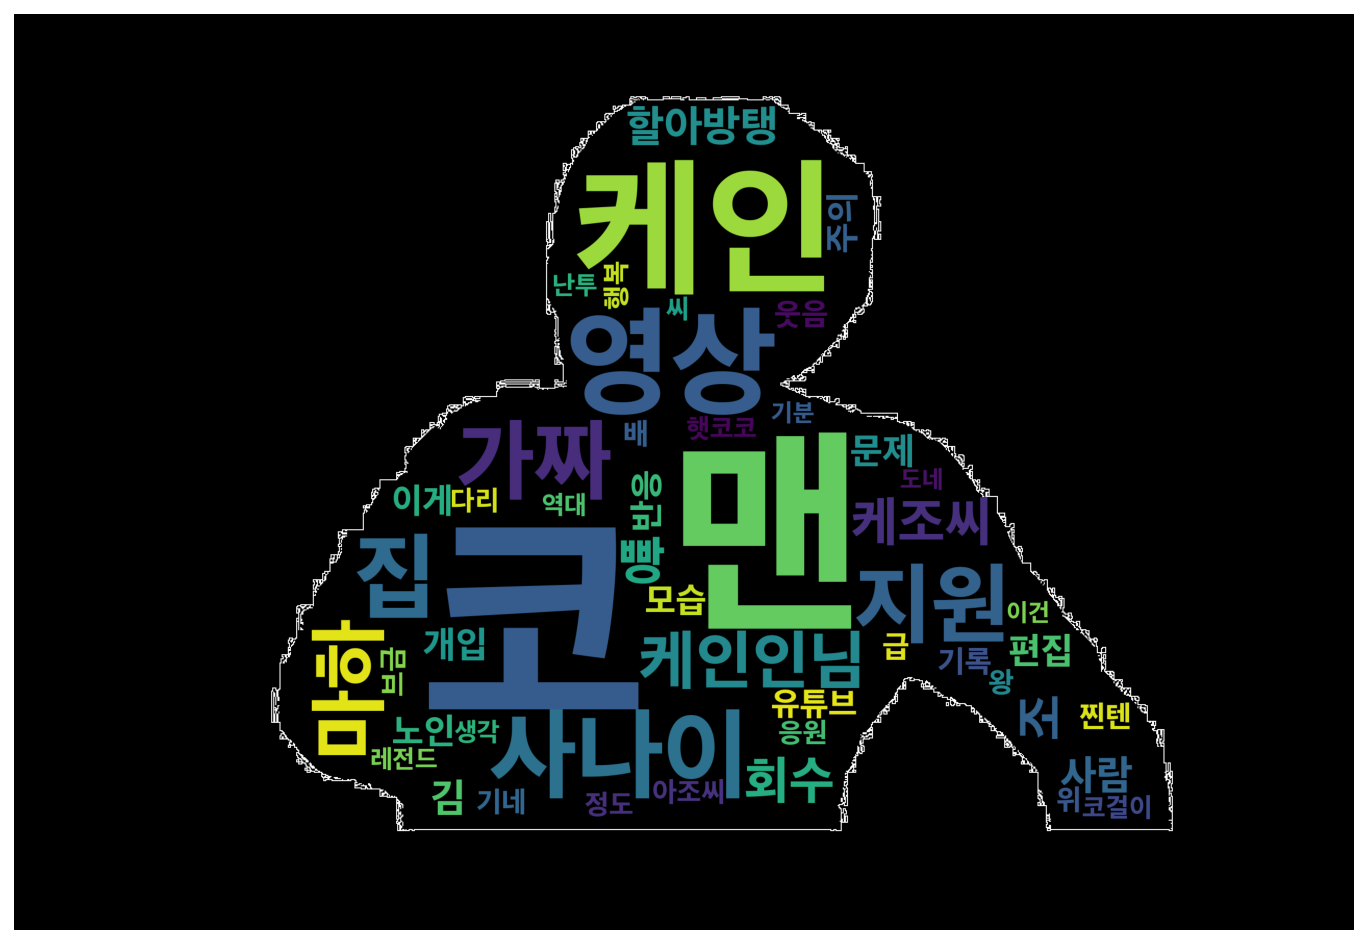

In [113]:
#############################################################
img = Image.open('C:/workspace/Img/dsds.jpg')
# 0으로 표시된 부분에 워드클라우드가 그려지게 된다.
img_array = np.array(img)

font_path = "C:/dd/AppleSDGothicNeoEB.ttf"

# WC 지정
wc = WordCloud(font_path = font_path,
               max_font_size = 250,
               width = 1000,
               height = 1000,
               scale = 2.0,
               mask = img_array,
              contour_color = 'white',
              contour_width = 0.5).generate_from_frequencies(top_nouns)


# 출력
plt.figure(figsize = (12, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()

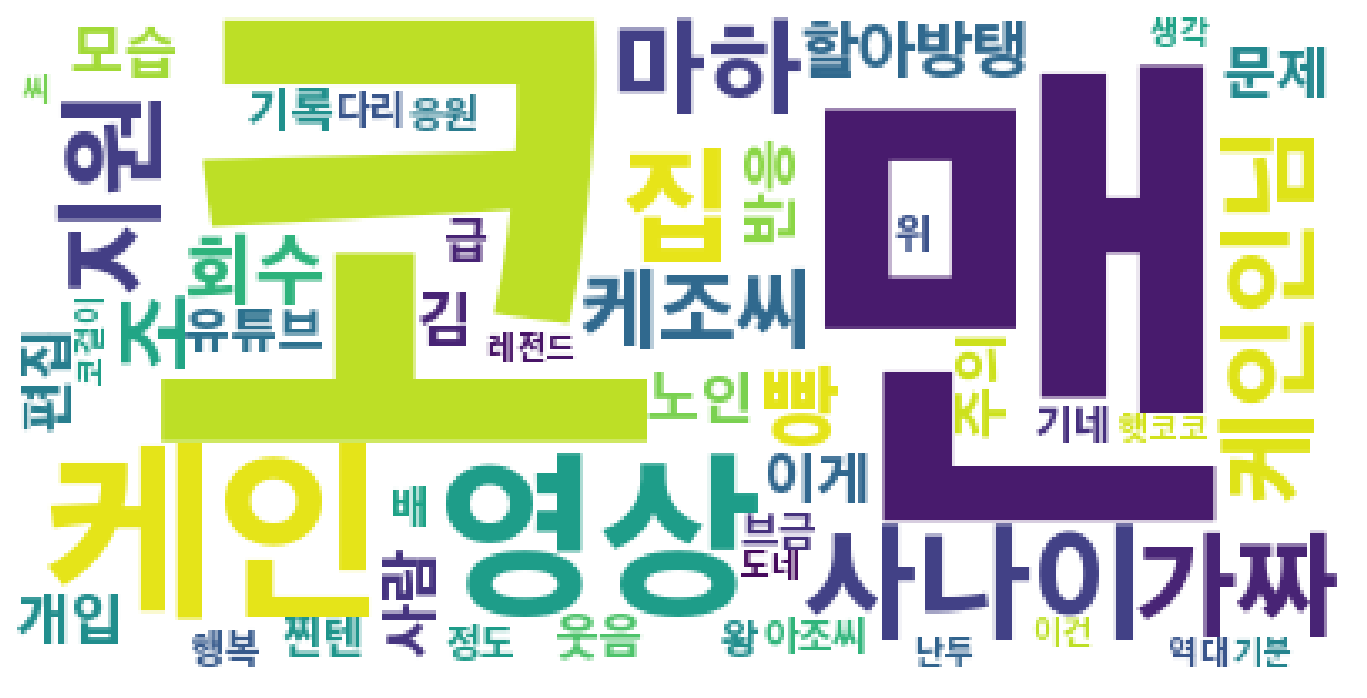

<AxesSubplot:>

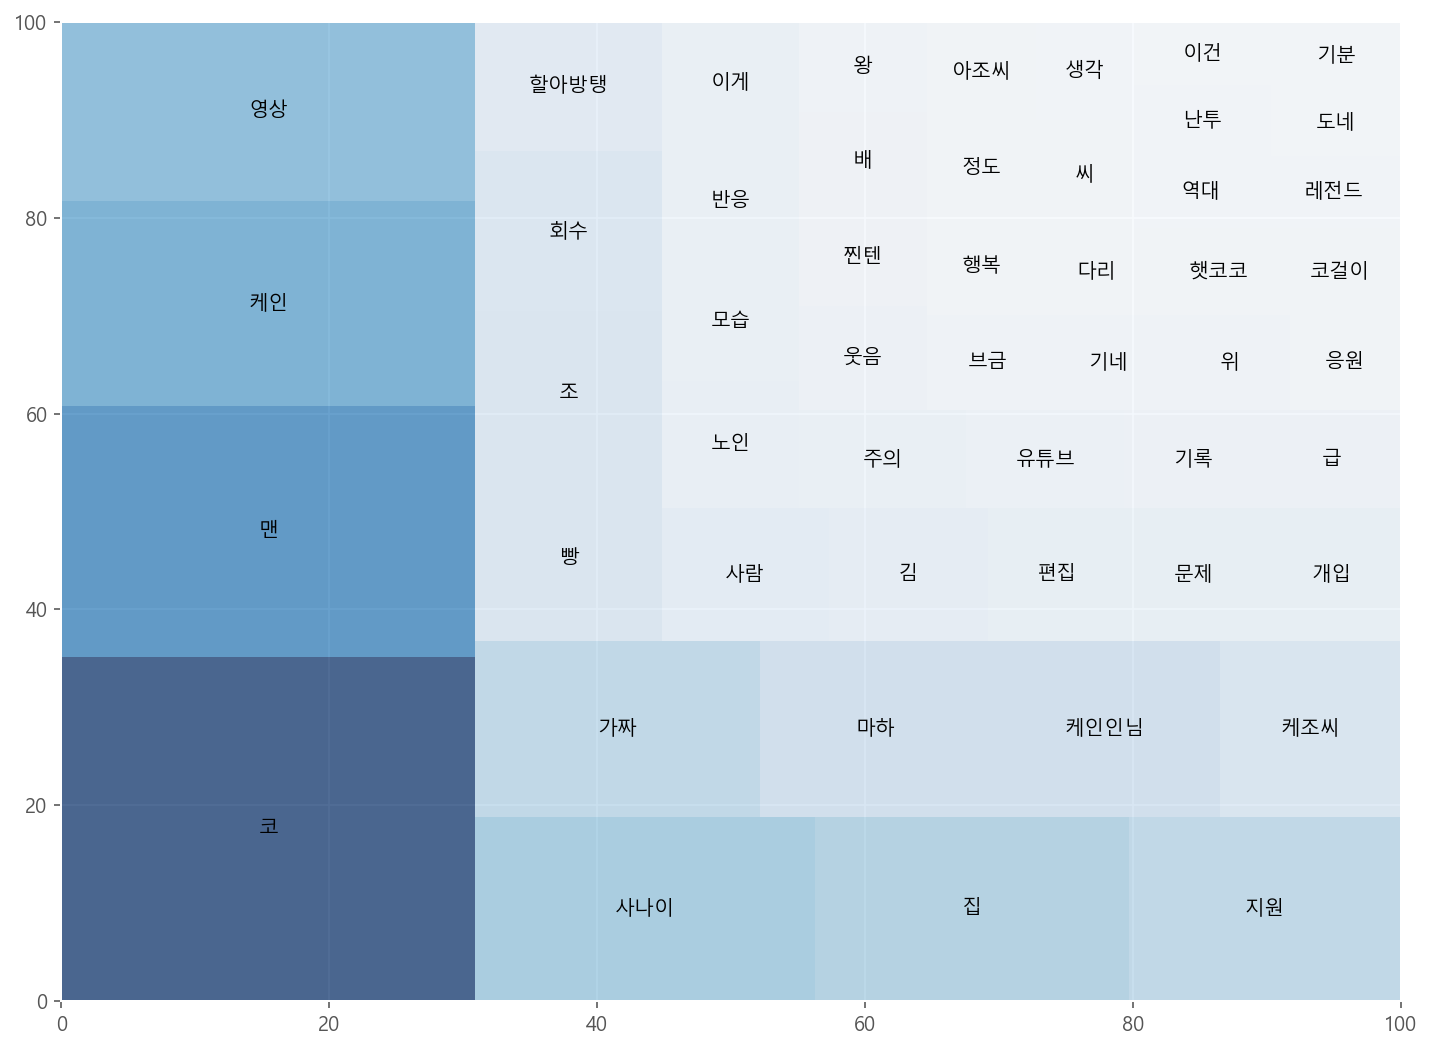

In [18]:
# Treemap
plt.figure(figsize = (12, 9))
norm = mpl.colors.Normalize(vmin = min(top_nouns.values()),
                           vmax = max(top_nouns.values()))
colors = [plt.cm.Blues(norm(value)) for value in top_nouns.values()]

squarify.plot(label = top_nouns.keys(),
             sizes = top_nouns.values(),
             color = colors,
             alpha = .7)

- 전처리(불용어 추가, Mecab 사전에 사용자 단어 추가, 등) 후, 특징성이 뚜렷한 단어들만 남아있다.

## 군집분석Cluster Analysis

### Word2Vec 생성

In [36]:
tagger = Mecab(dicpath = r"C:/mecab/mecab-ko-dic")
comment = [tagger.nouns(x) for x in raw]

print(comment[:3])

[['환갑', '연세', '도전', '모습', '응원', '숫자', '터무니', '게', '포'], ['케조씨', '빵', '거', '코', '합성', '지원', '거'], ['웅장', '배경', '베', '짱', '자세', '화면', '등장', '완벽']]


In [37]:
word2vec = Word2Vec(comment, min_count = 1)
word2vec

#### Similarity 확인

In [58]:
word2vec.wv.most_similar('케인인님')

[('것', 0.41585636138916016),
 ('코', 0.39808401465415955),
 ('반응', 0.3849949240684509),
 ('케인', 0.3816394507884979),
 ('달성', 0.36598116159439087),
 ('드립', 0.35755693912506104),
 ('맨', 0.3503376245498657),
 ('번', 0.3314947783946991),
 ('사나이', 0.31669148802757263),
 ('난투', 0.30862298607826233)]

- 역시 `코` 의 similarity가 많은 단어에서 상위권을 차지

#### t-sne를 이용한 단어벡터 시각화

In [47]:
tsne = TSNE(n_components = 2)  ## 2차원으로 차원숙소 (차원 축소 결과 임베딩되는 차원)

vocab = list(word2vec.wv.index_to_key)
similarity = word2vec.wv[vocab]
similarity

array([[-0.00405241,  0.00542463,  0.00453763, ..., -0.01361584,
         0.00569802,  0.0040305 ],
       [-0.0108225 ,  0.00715247,  0.00495079, ..., -0.00608054,
        -0.00635972,  0.00301045],
       [-0.00207927,  0.00734619, -0.0074345 , ..., -0.00476917,
         0.01214968, -0.00949899],
       ...,
       [ 0.00146905,  0.00074824, -0.00848675, ..., -0.00090601,
        -0.00959698, -0.00933988],
       [ 0.00751824, -0.00567682, -0.00903254, ...,  0.00508827,
        -0.00674318,  0.00683645],
       [-0.00300728,  0.00757494,  0.00929911, ..., -0.00049348,
         0.00113007, -0.00536781]], dtype=float32)

In [49]:
transform_similarity = tsne.fit_transform(similarity)
xy_df = pd.DataFrame(transform_similarity, index = vocab, columns = ['x', 'y'])
xy_df[:10]

C:\Users\User\anaconda3\envs\nlp\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,x,y
코,-26.903648,6.154724
거,-12.670259,13.334405
맨,-27.436495,3.913135
나,-27.308804,7.788432
케인,-28.769901,2.479965
영상,-27.090244,2.581627
사나이,-29.161999,4.546427
집,-24.117794,-2.313962
가짜,-27.230686,4.278511
지원,1.906527,21.843042


C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


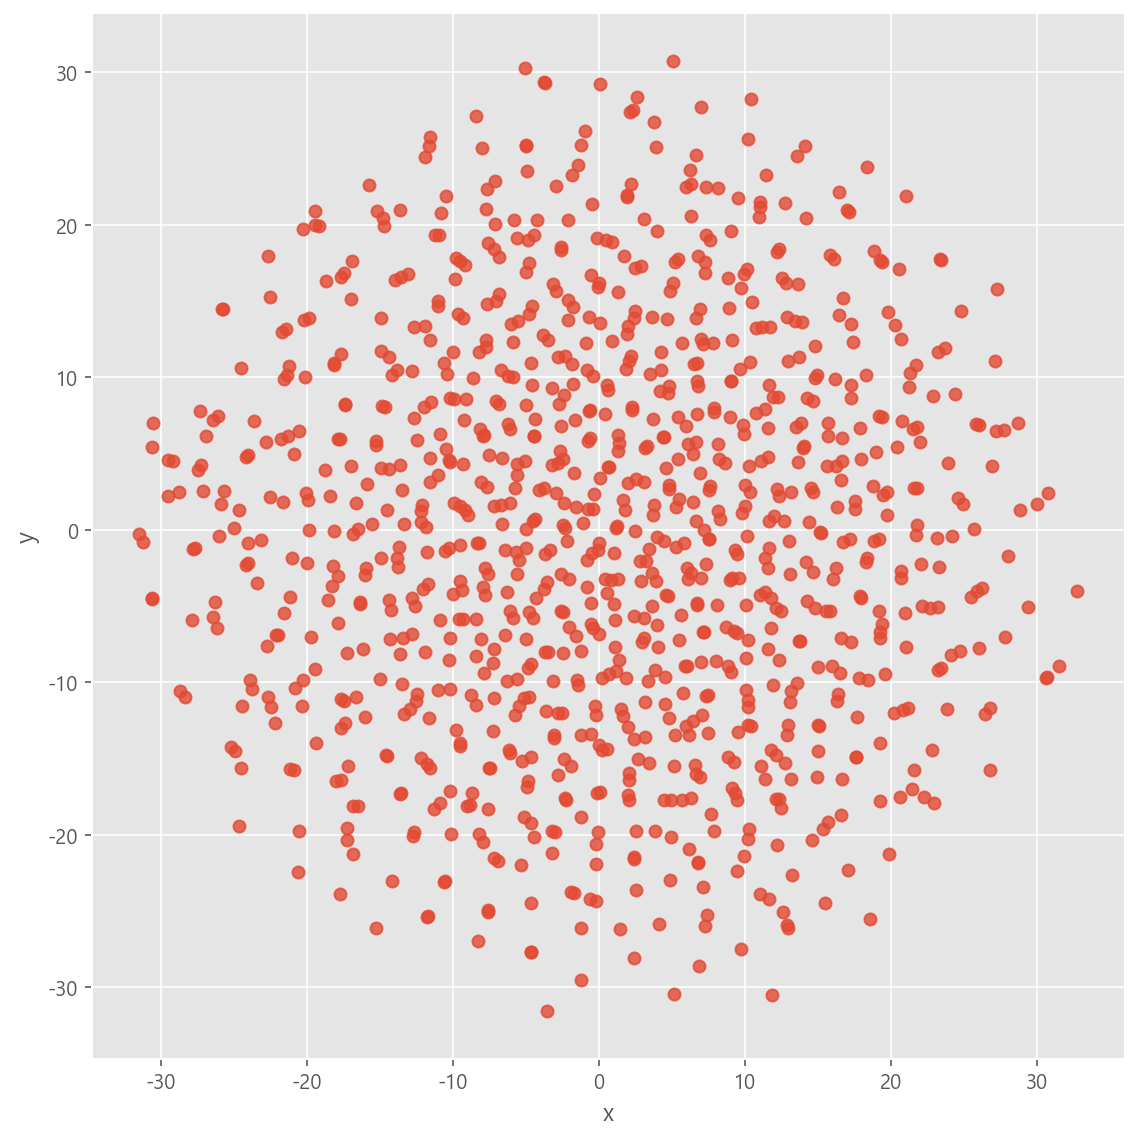

In [50]:
sns.lmplot('x', 'y', xy_df, fit_reg = False, size = 8)
plt.show()

### Scikit-learn을 활용한 계층적 군집화

#### ward

In [62]:
ward = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')
pred = ward.fit_predict(xy_df)

results = xy_df
results['predict'] = pred
results[:10]

,x,y,predict
코,-26.903648,6.154724,0
거,-12.670259,13.334405,1
맨,-27.436495,3.913135,0
나,-27.308804,7.788432,0
케인,-28.769901,2.479965,0
영상,-27.090244,2.581627,0
사나이,-29.161999,4.546427,0
집,-24.117794,-2.313962,0
가짜,-27.230686,4.278511,0
지원,1.906527,21.843042,1


C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


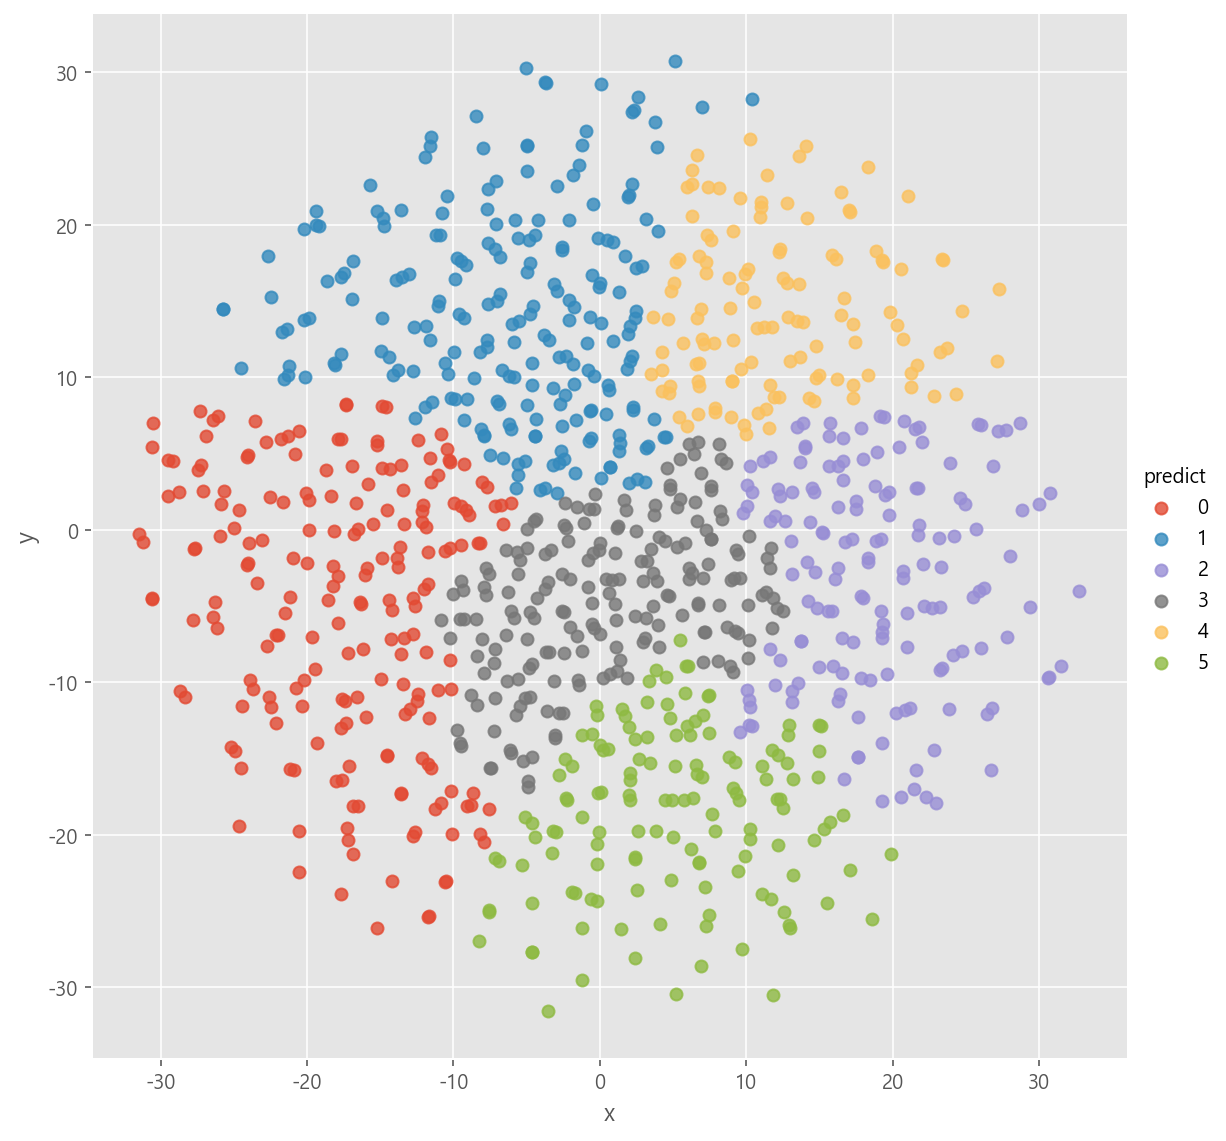

In [63]:
# 시각화
sns.lmplot('x', 'y', xy_df, fit_reg = False, size = 8, hue = 'predict')
plt.show()

#### average

In [64]:
average = AgglomerativeClustering(n_clusters = 6, linkage = 'average')
pred = average.fit_predict(xy_df)

results = xy_df
results['predict'] = pred
results[:10]

,x,y,predict
코,-26.903648,6.154724,1
거,-12.670259,13.334405,0
맨,-27.436495,3.913135,1
나,-27.308804,7.788432,1
케인,-28.769901,2.479965,1
영상,-27.090244,2.581627,1
사나이,-29.161999,4.546427,1
집,-24.117794,-2.313962,1
가짜,-27.230686,4.278511,1
지원,1.906527,21.843042,0


C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


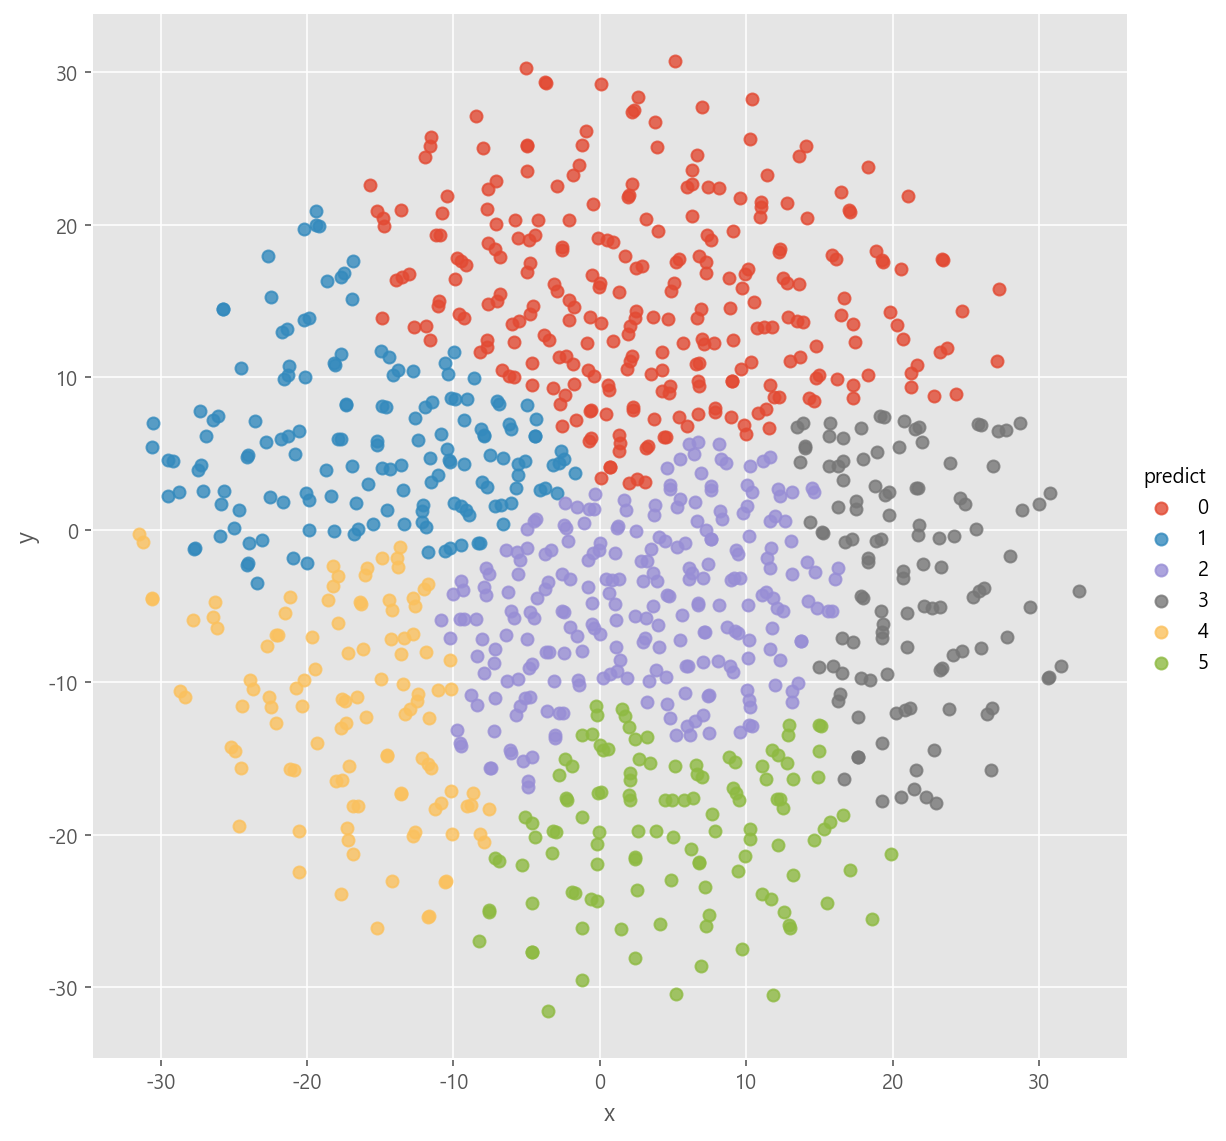

In [65]:
# 시각화
sns.lmplot('x', 'y', xy_df, fit_reg = False, size = 8, hue = 'predict')
plt.show()

#### complete.

In [66]:
complete = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
pred = complete.fit_predict(xy_df)

results = xy_df
results['predict'] = pred
results[:10]

,x,y,predict
코,-26.903648,6.154724,0
거,-12.670259,13.334405,2
맨,-27.436495,3.913135,0
나,-27.308804,7.788432,0
케인,-28.769901,2.479965,0
영상,-27.090244,2.581627,0
사나이,-29.161999,4.546427,0
집,-24.117794,-2.313962,0
가짜,-27.230686,4.278511,0
지원,1.906527,21.843042,2


C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


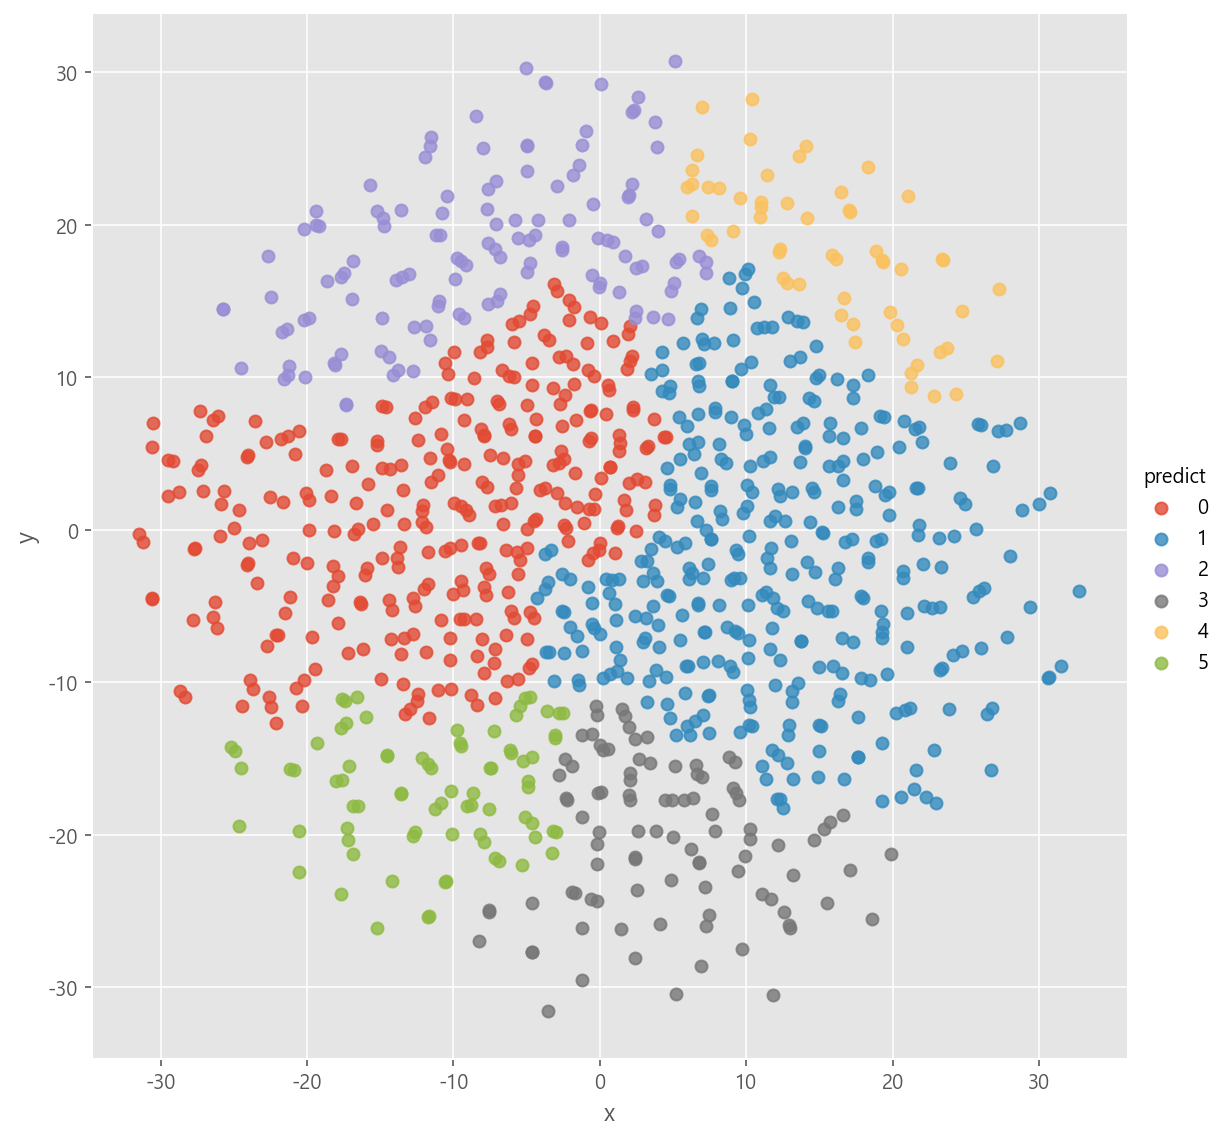

In [67]:
# 시각화
sns.lmplot('x', 'y', xy_df, fit_reg = False, size = 8, hue = 'predict')
plt.show()

### Scipy
- `scipy`를 이용한 거리사용과 word2vec 사용을 비교
- `pdist`를 이용한 각 단어간 유클리디안 거리 계산

#### euclidean

In [69]:
dismatrix = pdist(xy_df, metric = 'euclidean')
row_dist = pd.DataFrame(squareform(dismatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026
0,0.000000,16.066648,2.304049,1.683197,4.121498,3.577966,2.772502,8.915134,1.904502,32.865629,...,46.549915,26.777872,17.169593,21.062039,17.013781,31.424573,28.313963,26.838557,21.293077,26.327318
1,16.066648,0.000000,17.629578,15.781153,19.519665,18.098569,18.793776,19.491470,17.263118,16.878377,...,30.756763,12.834787,28.976988,7.477096,4.331863,33.512436,16.124512,31.778801,19.554051,13.364473
2,2.304049,17.629578,0.000000,3.877400,1.957537,1.375792,1.838048,7.056239,0.419353,34.445530,...,47.799878,27.716616,14.895107,22.108039,18.185307,29.894220,28.900789,25.062038,20.585642,27.095780
3,1.683197,15.781153,3.877400,0.000000,5.505872,5.211390,3.734291,10.594380,3.510790,32.481805,...,46.448584,26.990913,18.771286,21.218559,17.097569,33.003188,28.789615,28.473394,22.574962,26.675845
4,4.121498,19.519665,1.957537,5.505872,0.000000,1.682731,2.103332,6.680107,2.367266,36.331419,...,49.556751,29.356301,13.440824,23.811504,19.953564,29.584557,30.351538,24.456365,21.167543,28.650866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,31.424573,33.512436,29.894220,33.003188,29.584557,28.636263,31.416123,23.053328,30.069159,43.593548,...,49.032706,31.958922,20.917226,30.736284,30.602160,0.000000,28.592306,6.627408,15.006556,29.829411
1023,28.313963,16.124512,28.900789,28.789615,30.351538,28.670761,30.592032,26.762417,28.674575,16.244372,...,22.130255,4.721049,34.111786,8.802808,12.629265,28.592306,0.000000,30.196403,15.750443,2.966235
1024,26.838557,31.778801,25.062038,28.473394,24.456365,23.746047,26.402693,18.205822,25.295080,44.052124,...,51.393914,32.804896,14.703526,30.423242,29.392356,6.627408,30.196403,0.000000,15.058190,30.823377
1025,21.293077,19.554051,20.585642,22.574962,21.167543,19.676747,22.406969,15.228897,20.581377,29.915642,...,37.713797,18.219653,19.726585,16.243247,16.102405,15.006556,15.750443,15.058190,0.000000,16.215379


#### dendrogram

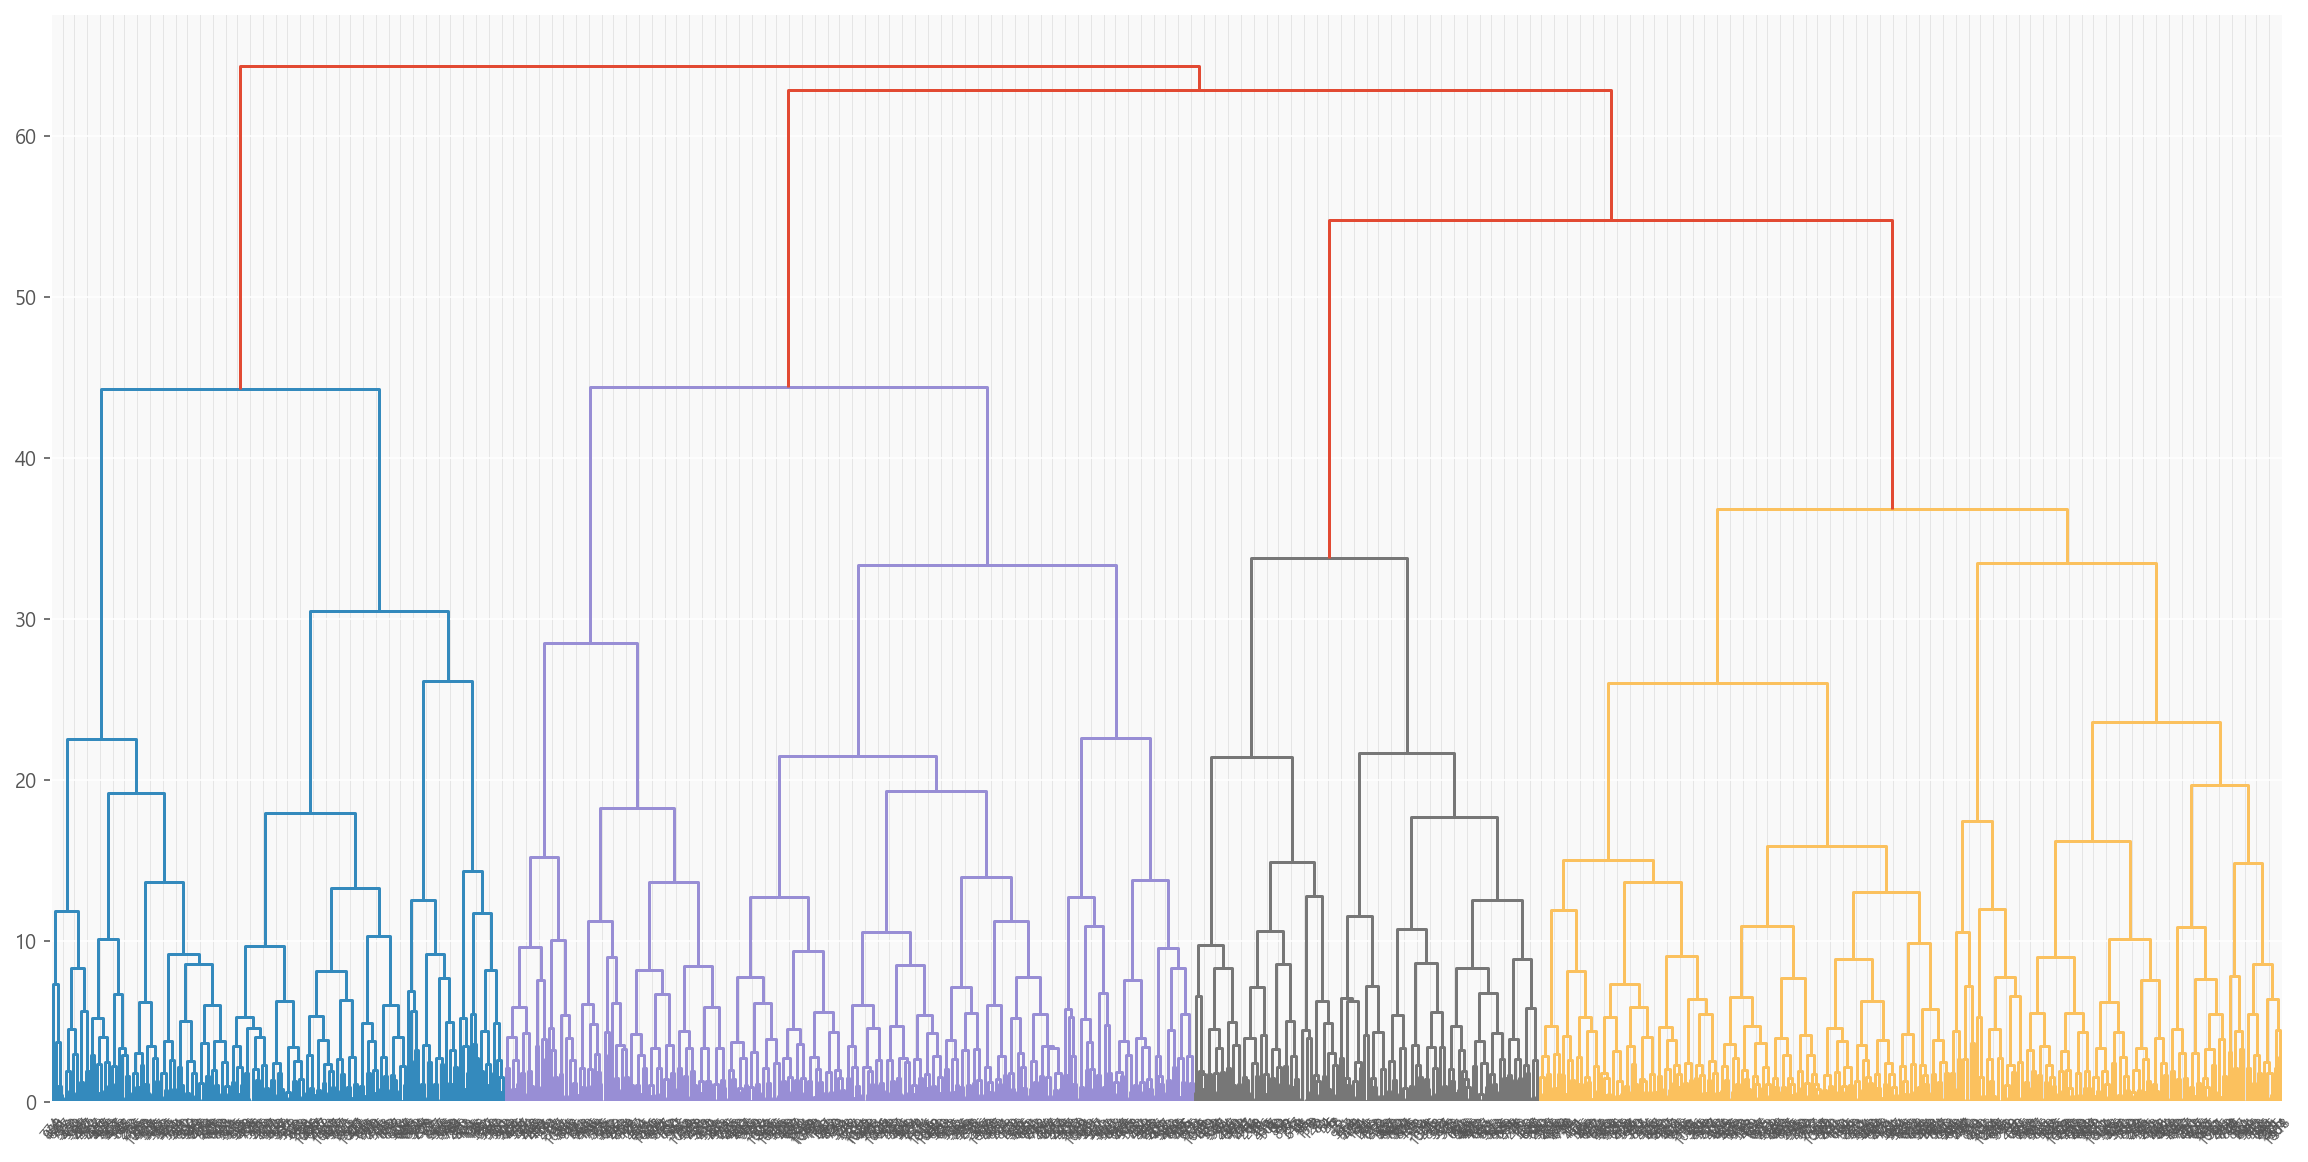

In [71]:
# 유클리디안 거리를 이용한 덴드로그램 시각화
row_clusters = linkage(dismatrix, method = 'complete')

plt.figure(figsize = (20, 10))
dendrogram(Z = row_clusters,
          leaf_rotation = 50,
          leaf_font_size = 7)

plt.show()

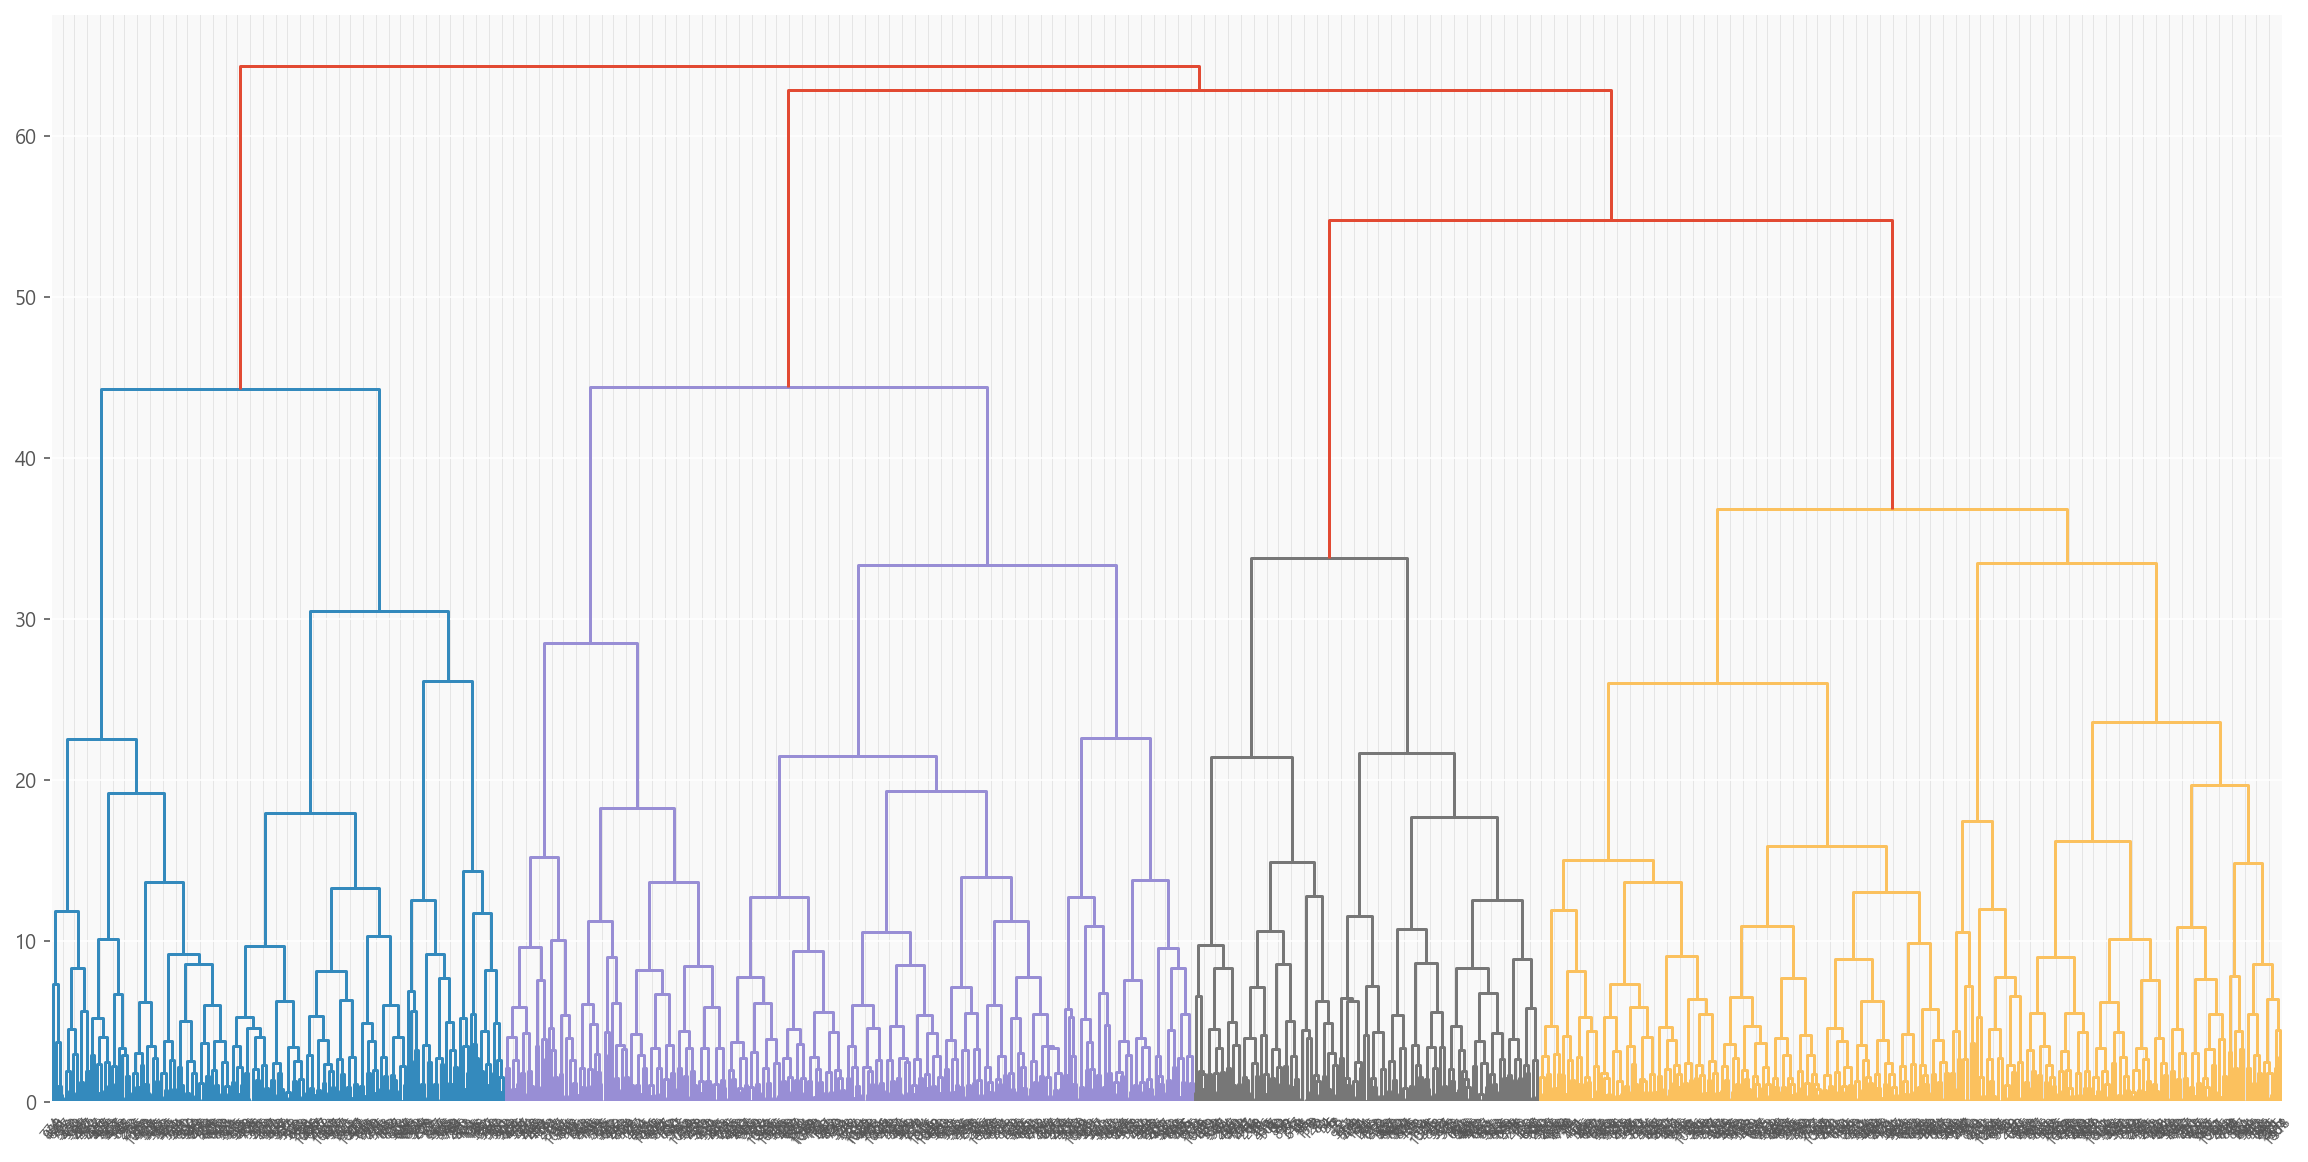

In [72]:
# word2vec을 이용한 덴드로그램 시각화
mm = linkage(xy_df, method = 'complete')

plt.figure(figsize = (20, 10))
dendrogram(Z = mm, leaf_rotation = 50, leaf_font_size = 7)
plt.show()

### 비계층적 군집화

In [75]:
# 클러스터 3개
kmeans = KMeans(n_clusters = 3)
pred = kmeans.fit_predict(xy_df)

results = xy_df
results['predict'] = pred
results[:10]

,x,y,predict
코,-26.903648,6.154724,2
거,-12.670259,13.334405,2
맨,-27.436495,3.913135,2
나,-27.308804,7.788432,2
케인,-28.769901,2.479965,2
영상,-27.090244,2.581627,2
사나이,-29.161999,4.546427,2
집,-24.117794,-2.313962,2
가짜,-27.230686,4.278511,2
지원,1.906527,21.843042,0


C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


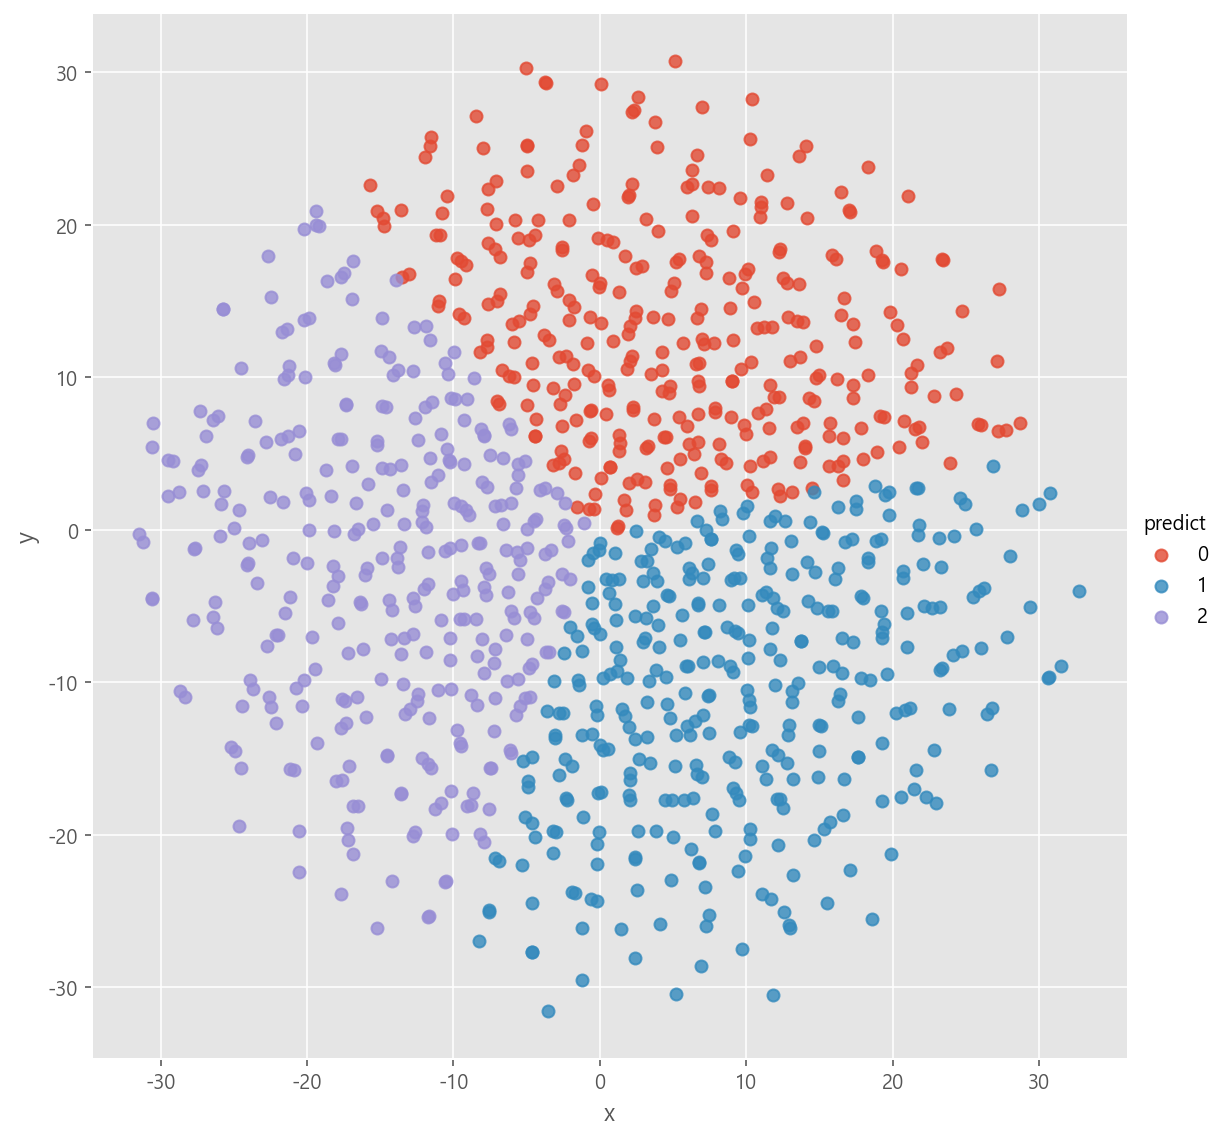

In [77]:
sns.lmplot('x', 'y', xy_df, fit_reg = False, size = 8, hue = 'predict')
plt.show()

In [78]:
# 클러스터 5개
kmeans = KMeans(n_clusters = 5)
pred = kmeans.fit_predict(xy_df)

results = xy_df
results['predict'] = pred
results[:10]

,x,y,predict
코,-26.903648,6.154724,2
거,-12.670259,13.334405,0
맨,-27.436495,3.913135,2
나,-27.308804,7.788432,2
케인,-28.769901,2.479965,2
영상,-27.090244,2.581627,2
사나이,-29.161999,4.546427,2
집,-24.117794,-2.313962,2
가짜,-27.230686,4.278511,2
지원,1.906527,21.843042,0


C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


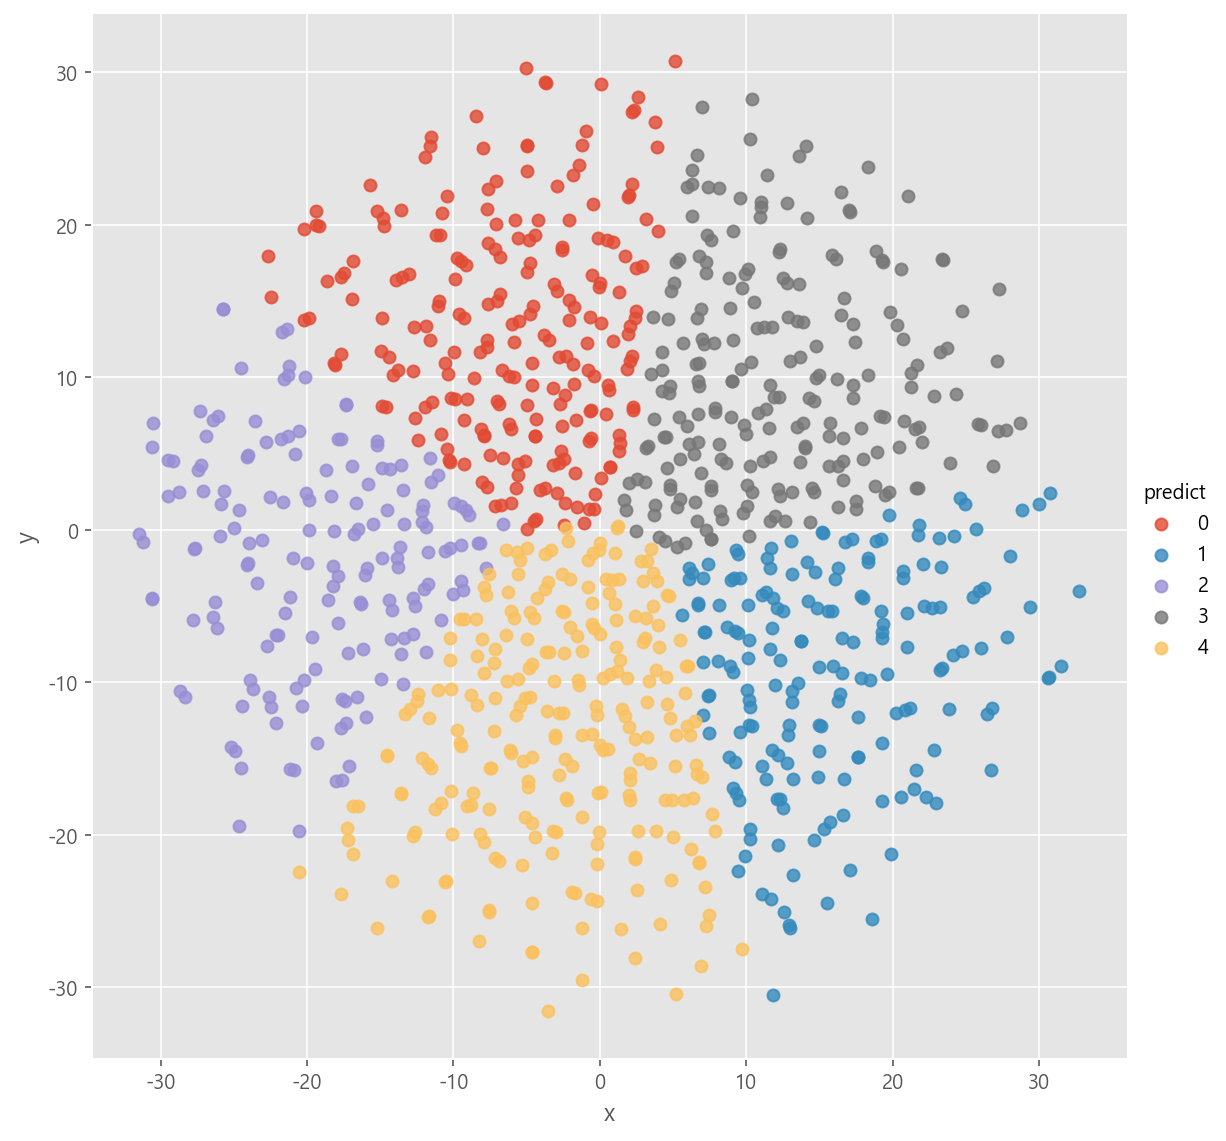

In [79]:
sns.lmplot('x', 'y', xy_df, fit_reg = False, size = 8, hue = 'predict')
plt.show()

## Gensim을 이용한 Word2Vec

### CBOW

In [132]:
comment[:4]

[['환갑', '연세', '도전', '모습', '응원', '숫자', '터무니', '게', '포'],
 ['케조씨', '빵', '거', '코', '합성', '지원', '거'],
 ['웅장', '배경', '베', '짱', '자세', '화면', '등장', '완벽'],
 []]

In [121]:
model_cbow = Word2Vec(sentences = comment, window = 4, vector_size = 100, min_count = 5, workers = 4, sg = 0)

In [124]:
model_cbow.wv.similarity('코', '케인')

0.51405776

In [125]:
model_cbow.wv.most_similar(positive = ['코'])

[('가짜', 0.630085825920105),
 ('사나이', 0.6111522912979126),
 ('번', 0.5952463746070862),
 ('저', 0.5430737733840942),
 ('케조씨', 0.5319321751594543),
 ('맨', 0.526379406452179),
 ('난', 0.5195410847663879),
 ('케인', 0.5140578150749207),
 ('문제', 0.5020383596420288),
 ('영상', 0.5015293955802917)]

In [129]:
model_cbow.wv.most_similar(positive = ['케조씨', '아조씨'], negative = ['코'])

[('걸', 0.32366040349006653),
 ('만', 0.30450841784477234),
 ('사나이', 0.2856577932834625),
 ('케인', 0.2736532986164093),
 ('코트', 0.2622238099575043),
 ('기분', 0.26149994134902954),
 ('크기', 0.24830171465873718),
 ('듯', 0.24542757868766785),
 ('극찬', 0.24410581588745117),
 ('알고리즘', 0.24186621606349945)]

### Skip-gram

In [133]:
model_skip_gram = Word2Vec(sentences = comment, window = 4, vector_size = 100, min_count = 5, workers = 4, sg = 1)

In [134]:
model_skip_gram.wv.similarity('코', '케조씨')

0.90677667

In [135]:
model_skip_gram.wv.most_similar(positive = ['케조씨', '아조씨'], negative = ['코'])

[('사나이', 0.8090552091598511),
 ('케인', 0.8051620125770569),
 ('만', 0.8014136552810669),
 ('영상', 0.7901595234870911),
 ('번', 0.7844853401184082),
 ('걸', 0.7787500023841858),
 ('맨', 0.7751374244689941),
 ('가짜', 0.7749748826026917),
 ('조', 0.7744613289833069),
 ('너', 0.7727957963943481)]

### Embedding Vector 시각화

In [137]:
model_skip_gram.wv.save_word2vec_format('kane_w2v')

#### metadata.tsv와 tensor.tsv 데이터 생성

In [138]:
!python -m gensim.scripts.word2vec2tensor -i kane_w2v -o kane_w2v

2021-12-28 16:17:33,805 - word2vec2tensor - INFO - running C:\Users\User\anaconda3\envs\nlp\lib\site-packages\gensim\scripts\word2vec2tensor.py -i kane_w2v -o kane_w2v
2021-12-28 16:17:33,805 - keyedvectors - INFO - loading projection weights from kane_w2v
2021-12-28 16:17:33,826 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (156, 100) matrix of type float32 from kane_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2021-12-28T16:17:33.820685', 'gensim': '4.1.2', 'python': '3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'load_word2vec_format'}
2021-12-28 16:17:33,835 - word2vec2tensor - INFO - 2D tensor file saved to kane_w2v_tensor.tsv
2021-12-28 16:17:33,835 - word2vec2tensor - INFO - Tensor metadata file saved to kane_w2v_metadata.tsv
2021-12-28 16:17:33,835 - word2vec2tensor - INFO - finished running word2vec2tensor.py


- https://projector.tensorflow.org/

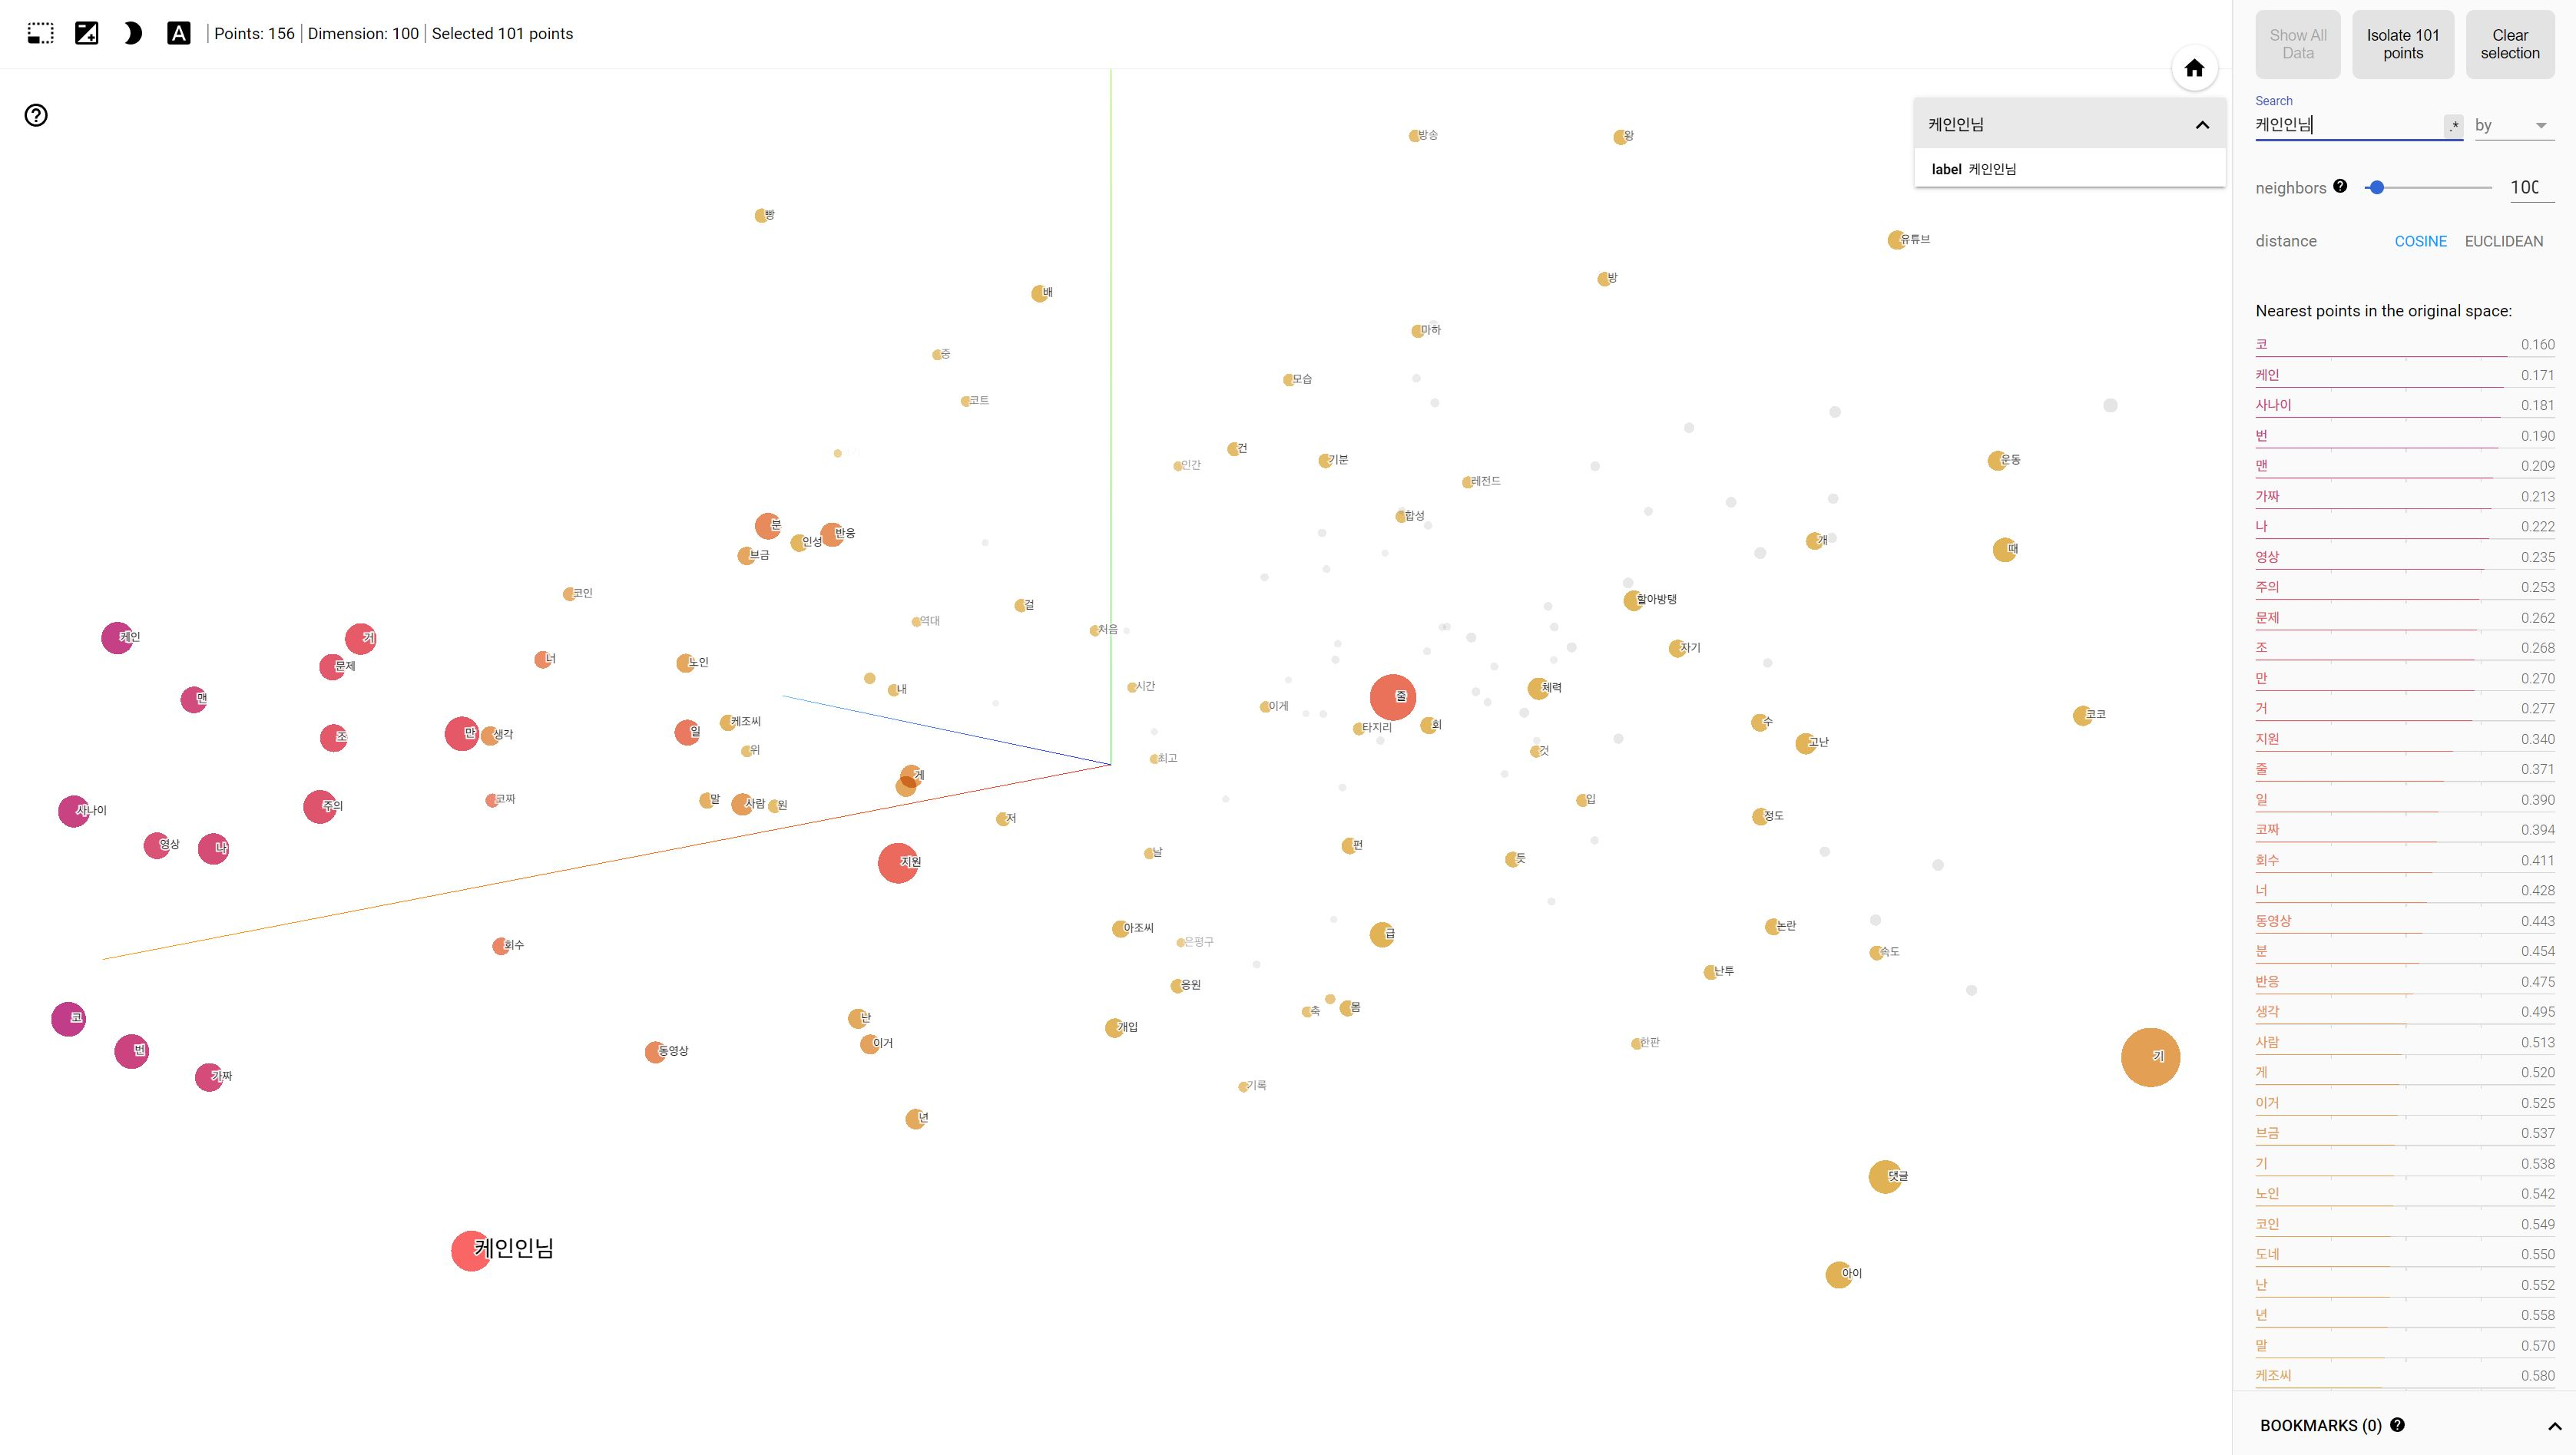

In [140]:
Image('C:/workspace/Img/kane_anaz.jpg')

## 소감
- 원 데이터가 너무 적다, 한 개의 영상에서만 수집하는게 아닌 ***테마***를 잡고 이를 중심으로 댓글데이터 수집이 필요하다.
- 분석에 있어서 도메인 지식이 높았기 때문에, stopword 추가하는게 매우 용이했음. 따로 검색이 필요없었다.
- 전처리하는데 꽤 많은 시간이 걸렸다.
- `Mecab` Dictionary 추가 등록하는데 많이 애먹었다.
- 더 다양한 분석기법을 활용해보고싶다.
    1. 영상을 테마별(킹오브, 고민상담, 기타게임, ....)로 분류해 댓글/조회수/좋아요 수/싫어요 수/업로드 날짜를 수집하고 여러가지 분석기법을 통해 스트리머에게 조회수와 댓글수를 높게 뽑는 방법을 추천 >> 추천시스템?
    2. 댓글 긍부정 분석을 통해 어떤 주제의 영상을 업로드하면 긍정여론을 많이 받을 수 있는지 제안
    3. 달 별로(each month) 조회수와 좋아요 수, 싫어요 수는 어떤 상관관계가 있는지?
    4. 3번을 시계열 그래프(line plot)로 시각화